# Simulação de um fluído incompressível entre duas placas paralelas

Marcelo Silva Barreiro A89640 Licenciatura em Física

Este trabalho foi fortemente baseado nos capítulos 16 e 19 da segunda edição do livro "Physics of
Continuous Matter" (de B. Lautrup, CRC Press) e nas lições online "12 steps to Navier-Stokes" da autoria de Lorena A. Barba, lições estas recomendadas pelo professor Nuno Castro, disponíveis no seguinte link:

https://lorenabarba.com/blog/cfd-python-12-steps-to-navier-stokes/

Com este trabalho, pretende-se implementar um algoritmo que resolva a equação de Navier-Stokes para o fluxo laminar de um fluído incompressível e aplicá-lo a um sistema bi-dimensional simples, constituído por duas placas paralelas infinitas. 

A equação de Navier-Stokes pode ser escrita como:

$$\frac{d}{dt}\vec{v}=-(\vec{v} \cdot \nabla) \vec{v}+v \nabla^2 \vec{v}-\frac{1}{\rho}\nabla P+\vec{F}$$

No sistema em estudo $\vec{F}$ só tem componente x e é constante.

$P$ é uma variável incógnita à partida. No entanto, no caso de um fluido incompressível ($\nabla\cdot\vec{v}=0$), $P$ pode ser calculado aplicando a divergência dos dois lados da equação de Navier-Stokes ($\nabla\cdot\vec{F}=0$):

$$\frac{d}{dt}\nabla\cdot\vec{v}=-\nabla\cdot\left[\left(\vec{v}\cdot\nabla\right)\vec{v}\right]+\nu\nabla\cdot\nabla^2\vec{v}-\frac{1}{\rho}\nabla^2 P$$

Como $\nabla\cdot\vec{v}=0$:

$$\frac{1}{\rho}\nabla^2 P=-\nabla\cdot\left[\left(\vec{v}\cdot\nabla\right)\vec{v}\right]+\nu\nabla\cdot\nabla^2\vec{v}$$

É de notar que:

$$\nabla\cdot\nabla^2\vec{v}=\nabla^2(\nabla\cdot\vec{v})=0$$

Então:

$$\frac{1}{\rho}\nabla^2 P=-\nabla\cdot\left[\left(\vec{v}\cdot\nabla\right)\vec{v}\right]$$

Desenvolvendo o termo à direita:

$$\frac{1}{\rho}\nabla^2 P=-(\vec{v}\cdot\nabla)\nabla\cdot\vec{v}-(\nabla(\vec{v}\cdot\nabla))\cdot\vec{v}$$

O primeiro termo do lado direito é cancelado, mais uma vez devido à condição de incompressibilidade do fluído:

$$\frac{1}{\rho}\nabla^2 P=-(\nabla(\vec{v}\cdot\nabla))\cdot\vec{v}$$

Após alguma manipulação obtém-se:

$$\frac{1}{\rho}\nabla^2 P=-\left(\frac{du}{dx}\right)^2-2\frac{du}{dy}\frac{dv}{dx}-\left(\frac{dv}{dy}\right)^2$$

Onde u é a componente x da velocidade e v a componente y.

Obtém-se assim uma forma de calcular $P$, sabendo unicamente $\vec{v}$, podendo prosseguir com a discretização para depois aplicar no algoritmo.

Discretizam-se então a equação de Navier-Stokes e a equação de Poisson para a pressão a duas dimensões. O índice n denota a evolução temporal, o índice i a coordenada x e o índice j a coordenada y. 

A componente x da velocidade toma a seguinte expressão: 

\begin{aligned}
\frac{u_{i, j}^{n+1}-u_{i, j}^{n}}{\Delta t}=-u_{i, j}^{n} \frac{u_{i, j}^{n}-u_{i-1, j}^{n}}{\Delta x}-v_{i, j}^{n} \frac{u_{i, j}^{n}-u_{i, j-1}^{n}}{\Delta y}- \frac{1}{\rho}\frac{p_{i+1, j}^{n}-p_{i-1, j}^{n}}{2 \Delta x} 
+\nu\left(\frac{u_{i+1, j}^{n}-2 u_{i, j}^{n}+u_{i-1, j}^{n}}{\Delta x^{2}}+\frac{u_{i, j+1}^{n}-2 u_{i, j}^{n}+u_{i, j-1}^{n}}{\Delta y^{2}}\right)+F
\end{aligned}

Isolando o termo o termo $u_{i, j}^{n+1}$ correspondente à velocidade no tempo seguinte obtém-se:

$$
u_{i, j}^{n+1}=u_{i, j}^{n}-u_{i, j}^{n} \frac{\Delta t}{\Delta x}\left(u_{i, j}^{n}-u_{i-1, j}^{n}\right)-v_{i, j}^{n} \frac{\Delta t}{\Delta y}\left(u_{i, j}^{n}-u_{i, j-1}^{n}\right)-\frac{\Delta t}{ 2\rho \Delta x}\left(p_{i+1, j}^{n}-p_{i-1, j}^{n}\right)+$$

$$\nu\left[\frac{\Delta t}{\Delta x^{2}}\left(u_{i+1, j}^{n}-2 u_{i, j}^{n}+u_{i-1, j}^{n}\right)+\frac{\Delta t}{\Delta y^{2}}\left(u_{i, j+1}^{n}-2 u_{i, j}^{n}+u_{i, j-1}^{n}\right)\right] + \Delta t F
\tag{1}
$$

A componente y tem a forma:

\begin{aligned}
\frac{v_{i, j}^{n+1}-v_{i, j}^{n}}{\Delta t}= -u_{i, j}^{n} \frac{v_{i, j}^{n}-v_{i-1, j}^{n}}{\Delta x}-v_{i, j}^{n} \frac{v_{i, j}^{n}-v_{i, j-1}^{n}}{\Delta y}-\frac{1}{\rho}\frac{p_{i, j+1}^{n}-p_{i, j-1}^{n}}{2 \Delta y}+\nu\left(\frac{v_{i+1, j}^{n}-2 v_{i, j}^{n}+v_{i-1, j}^{n}}{\Delta x^{2}}+\frac{v_{i, j+1}^{n}-2 v_{i, j}^{n}+v_{i, j-1}^{n}}{\Delta y^{2}}\right)
\end{aligned}

Isolando o termo o termo $v_{i, j}^{n+1}$ obtém-se:

$$v_{i, j}^{n+1}=v_{i, j}^{n}-u_{i, j}^{n} \frac{\Delta t}{\Delta x}\left(v_{i, j}^{n}-v_{i-1, j}^{n}\right)-v_{i, j}^{n} \frac{\Delta t}{\Delta y}\left(v_{i, j}^{n}-v_{i, j-1}^{n}\right)-\frac{\Delta t}{ 2\rho \Delta y}\left(p_{i, j+1}^{n}-p_{i, j-1}^{n}\right)$$

$$+\nu\left[\frac{\Delta t}{\Delta x^{2}}\left(v_{i+1, j}^{n}-2 v_{i, j}^{n}+v_{i-1, j}^{n}\right)+\frac{\Delta t}{\Delta y^{2}}\left(v_{i, j+1}^{n}-2 v_{i, j}^{n}+v_{i, j-1}^{n}\right)\right]\tag{2}$$

Discretiza-se também a equação de Poisson para a pressão. No entanto, assumir que a divergência da velocidade é nula pode amplificar os erros numéricos. Para evitar que isso aconteça, assume-se que a divergência da velocidade é nula no tempo seguinte. Desta forma, inclui-se a derivada temporal da divergência da velocidade no tempo atual, que já não é obrigatoriamente 0 (pág. 325 secção "Divergence suppression" do livro mencionado acima). 

$$\frac{p_{i+1, j}^{n}-2 p_{i, j}^{n}+p_{i-1, j}^{n}}{\Delta x^{2}}+\frac{p_{i, j+1}^{n}-2 p_{i, j}^{n}+p_{i, j-1}^{n}}{\Delta y^{2}}=\rho\left[\frac{1}{\Delta t}\left(\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}+\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right)-\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x} \frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}-2 \frac{u_{i, j+1}-u_{i, j-1}}{2 \Delta y} \frac{v_{i+1, j}-v_{i-1, j}}{2 \Delta x}-\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y} \frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right]$$

Isolando também o termo $p_{i+1, j}^{n}$:

$$p_{i, j}^{n}=\frac{\left(p_{i+1, j}^{n}+p_{i-1, j}^{n}\right) \Delta y^{2}+\left(p_{i, j+1}^{n}+p_{i, j-1}^{n}\right) \Delta x^{2}}{2\left(\Delta x^{2}+\Delta y^{2}\right)}-\frac{\rho \Delta x^{2} \Delta y^{2}}{2\left(\Delta x^{2}+\Delta y^{2}\right)}\times\left[\frac{1}{\Delta t}\left(\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}+\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right)-\frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x} \frac{u_{i+1, j}-u_{i-1, j}}{2 \Delta x}\right.$$

$$\left.-2 \frac{u_{i, j+1}-u_{i, j-1}}{2 \Delta y} \frac{v_{i+1, j}-v_{i-1, j}}{2 \Delta x}-\frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y} \frac{v_{i, j+1}-v_{i, j-1}}{2 \Delta y}\right]\tag{3}$$

Pretende-se então resolver as equações diferenciais ordinárias discretizadas (1) e (2) para as componentes x e y da velocidade no tempo seguinte, sendo para isso necessário resolver a equação de Poisson para a pressão (3) a cada iteração.

Aplica-se este algoritmo a um sistema que consiste em duas placas paralelas infinitas, posicionadas em $y=0$ e $y=d$, entre as quais existe um fluxo laminar (número de Reynolds $Re=100$) de um fluído incompressível.

Pretende-se estudar o sistema em condições diferentes. Uma primeira fase onde o fluido entra na região entre as placas e se adapta aos constrangimentos que estas impõe, e uma outra fase mais avançada na qual o fluxo do fluído é homogéneo e sente uma força externa segundo x (que pode ser, por exemplo, a gravidade). Na prática, estes dois sistemas consistem em zonas diferentes do mesmo sistema, ou seja, é análogo a analizar o sistema na entrada para o primeiro caso e analizar o sistema muito longe da entrada no segundo caso.

No primeiro caso, as condições iniciais são:

$$u=U$$ 

$$v,p=0$$ em todo o canal. 

As condições de fronteira são:

\begin{array}{rrrr}
u=U, & v=0, & \nabla_{x} p=0 & \text { para } x=0 \\
\nabla_{x} u=0, & \nabla_{x} v=0, & \nabla_{x} p=0 & \text { para } x=L, \\
\nabla_{y} u=0, & v=0,&  & \text { para } y=\frac{d}{2} \\
u=0, & v=0, & \nabla_{y} p=0 & \text { para } y=d \\
u=0, & v=0, &\nabla_{y} p=0 & \text { para } y=0
\end{array}

As condições para $y=\frac{d}{2}$ são condições de simetria do sistema, que na prática surtem pouco efeito nos resultados.

No segundo caso, as condições iniciais são:

$$u,v,p=0$$ 

As condições de fronteira são:

Velocidades e pressão periódicas em x, ou seja, cortar uma porção das placas mais à frente ou mais atrás é indiferente, o fluxo é igual em todo o x (assumindo que se está a cortar muito longe da entrada): $u(0,y)=u(L,y)$ , $v(0,y)=v(L,y)$ e $P(0,y)=p(L,y)$

 $$u,v=0 \text{ em }y=0,d$$ 

$$\frac{dp}{dy}=0 \text{ em }y=0,d$$

$$F=1 \text{ em todo lado }$$ 


Existe também uma solução analítica para o segundo caso, que passo a descrever de modo a ter um termo de comparação qualitativo e justificar as condições de fronteira periódicas:

Devido à simetria do problema, a velocidade é da forma:

$$\vec{v}=(u(y),0,0)$$

Ou seja, só existe componente x da velocidade e esta só depende de y.

Assumindo fluxo estacionário e com esta simplificação, a equação de Navier-Stokes fica:

$$\nabla P=\nu\rho \hat{x} \nabla^{2} u(y)$$

Esta equação implica que $P=P(x)$, e a equação fica:

$$\frac{d P(x)}{d x}=\nu \rho \frac{d^{2} u(y)}{d y^{2}}$$

O lado esquerdo da equação depende unicamente de x, já o lado direito da equação depende unicamente de y. Isto só é possível caso ambos os lados sejam iguais a uma constante. Denotando esta constante como $-G$, têm-se:

$$P=P_0 - Gx$$

$$u=-\frac{G}{2 \nu \rho} y^{2}+A y+B$$

Onde $A$ e $B$ se obtém aplicando as condições de fronteira do problema. Assume-se momentaneamente que a linha intermédia entre as duas placas corresponde a $y=0$ e as placas se situam em $\pm a=\pm d/2$ de modo a simplificar as contas (de facto a escolha do referencial não deve afetar a solução). Temos assim que:

$$u(-a)=u(a)=0$$

Através destas condições obtém-se $A=0$ e B=$Ga^2/2\nu\rho$

Assim, a solução é da forma:

$$v_{x}=\frac{G}{2 \nu \rho}\left(a^{2}-y^{2}\right)$$

É assim de esperar que o resultado tenha a forma de uma parábola côncava.

Anteriormente definiu-se que as placas se situavam em $y=0$ e $y=d$, logo não é de esperar que computacionalmente se obtenha exatamente a mesma solução. Para se poder ter um termo de comparação é necessário aplicar a transformação $y'=y-a$ no resultado anterior para obter o resultado no referencial escolhido:

$$v_{x}=\frac{G}{2 \nu \rho}\left(\left(\frac{d}{2}\right)^{2}-\left(y-\frac{d}{2}\right)^{2}\right)$$

Resolve-se de seguida a equação linear para a pressão.

Calculando a velocidade média:

$$u_{med}=\frac{1}{2a}\int_{-a}^a \frac{(\partial_x P)}{2 \nu \rho}\left(a^{2}-y^{2}\right) dy$$

Tem-se:

$$u_{med}=-\frac{a^2}{3\nu\rho}\frac{dp}{dx}$$

Por sua vez, a velocidade máxima é:

$$u_{max}=-\frac{a^2}{2\nu\rho}\frac{dp}{dx}$$

Logo:

$$u_{max}=\frac{3}{2}u_{med}$$

Como o fluído é incompressível $u_{med}=U$. Assim:

$$-\frac{a^2}{2\nu\rho}\frac{dp}{dx}=\frac{3}{2}U$$

Isolando a derivada da pressão:

$$\frac{dp}{dx}=-\frac{3U\nu\rho}{a^2}$$

Assumindo que a pressão é 0 na saída:

$$P=\frac{3U\nu\rho}{a^2}(L-x)$$

É assim de esperar que $u_{max}=\frac{3}{2}u_{med}$ e que $P=\frac{3U\nu\rho}{a^2}(L-x)=\frac{3U\nu\rho}{(d/2)^2}(L-x)$.

Após todas estas considerações, procede-se então para a concretização daquilo que foi aqui descrito.

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable

Define-se a função fonte_Poisson, que tal como o nome indica, calcula a fonte da equação de Poisson. 

$$\nabla^2 P=s$$

Ou seja, fonte_Poisson calcula s.

In [2]:
def fonte_Poisson(u,v,dx,dy,dt,inst):
    s=np.zeros([ny,nx])
    
    #Cálculo em pontos intermédios                
    s[1:-1,1:-1]=( rho * ( ( (u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) / dt  -
                
                ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 
               
                - ((u[2:, 1:-1] - u[0:-2, 1:-1])  * (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2* dx * dy))-
                            
                ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2 )) 
    
    #Caso se trate do sistema com condições de fronteira periódicas
    if inst==0:
        #Condições de fronteira periódicas em x=2
        s[1:-1, -1] = (rho * (((u[1:-1, 0] - u[1:-1,-2]) / (2 * dx) + (v[2:, -1] - v[0:-2, -1]) / (2 * dy)) / dt -
                 
                ((u[1:-1, 0] - u[1:-1, -2]) / (2 * dx))**2 -
                          
                ((u[2:, -1] - u[0:-2, -1]) * (v[1:-1, 0] - v[1:-1, -2]) / (2 * dy * dx)) -
                          
                 ((v[2:, -1] - v[0:-2, -1]) / (2 * dy))**2))

        # e em x = 0
        s[1:-1, 0] = (rho * (((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx) + (v[2:, 0] - v[0:-2, 0]) / (2 * dy)) / dt -
                
                 ((u[1:-1, 1] - u[1:-1, -1]) / (2 * dx))**2 -
                         
                  ((u[2:, 0] - u[0:-2, 0]) * (v[1:-1, 1] - v[1:-1, -1]) / (2 * dy * dx))-
                           
                 ((v[2:, 0] - v[0:-2, 0]) / (2 * dy))**2))
    
    return s

A função "eq_Poisson" é responsável por resolver a equação de Poisson para a pressão em cada iteração, através do método de sobre-relaxação.

In [3]:
def eq_Poisson(p,s,dx,dy,precisao,w,inst):
    epsilon=1
    pn = np.empty([ny, nx])
    contador=0
    while epsilon>precisao:
        #cria-se um array intermédio, senão quando fosse a aplicar as condições de fronteira periódicas p já tinha sido alterado
        pn = np.copy(p)
        p[1:-1, 1:-1] =( (1-w)*pn[1:-1, 1:-1] + 
            
                  w*( ((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 +(pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2)/(2 * (dx**2 + dy**2)) -
                         
                   dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * s[1:-1, 1:-1] ) )
        
        #Caso se trate do sistema com condições de fronteira periódicas
        if inst==0:
            #Condições de fronteira periódicas em x=2
            p[1:-1, -1] =( (1-w)*pn[1:-1, -1] + 
        
                     w*( ((pn[1:-1, 0] + pn[1:-1, -2])* dy**2 + (pn[2:, -1] + pn[0:-2, -1]) * dx**2) / (2 * (dx**2 + dy**2)) -
                       
                     dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * s[1:-1, -1] ) )

            # e em x = 0
            p[1:-1, 0] =( (1-w)*pn[1:-1, 0] + w*(((pn[1:-1, 1] + 
                    
                    pn[1:-1, -1])* dy**2 + (pn[2:, 0] + pn[0:-2, 0]) * dx**2) / (2 * (dx**2 + dy**2)) -
                      
                    dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * s[1:-1, 0]) )
        
        #Caso se trate do sistema no qual o fluído se adapta aos constrangimentos
        if inst==1:
               
            p[:,0]=p[:,1]
            p[:,-1]=p[:,-2]
        
        # Condições de fronteira para a pressão nas paredes, comum a ambos os casos. 
        p[-1, :] = p[-2, :]
        p[0, :] = p[1, :] 
        
        #Condição para a precisão de p entre duas iterações
        epsilon=np.max(abs(p-pn))
        
        #Condição de paragem caso o algoritmo leve demasiadas iterações para convergir
        contador+=1
        if contador==10000:
            break
    
    return p

"derivada" é uma função auxiliar que calcula a derivada temporal da velocidade a cada iteração do algoritmo principal, para aplicar ao método de Euler.

O seu propósito principal é tornar o código em si mais inteligível, uma vez que poderia incluir estes cálculos na função principal, mas ficava algo bastante extenso e de difícil compreensão.

O parâmetro x é responsável por indicar à função se está a calcular a derivada em pontos interiores (x=1), se está a calcular a derivada na entrada (x=0) ou saída (x=2) do sistema. Nestes últimos dois casos aplica as condições de fronteira periódicas

In [4]:
def derivada(un,vn,p,rho,nu,F,x):
    #Caso se trate do calculo da derivada para pontos interiores
    if x==1:
        du= (-un[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[1:-1, 0:-2]) / dx -
                     
            vn[1:-1, 1:-1] * (un[1:-1, 1:-1] - un[0:-2, 1:-1])/ dy -
                     
            (p[1:-1, 2:] - p[1:-1, 0:-2])/ (2 * rho * dx) +
                     
            nu * ( (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2])/ dx**2  +
            (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1]) /dy**2 ) + F) 
    
    
        dv= (-un[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[1:-1, 0:-2])/ dx -
                     
            vn[1:-1, 1:-1] * (vn[1:-1, 1:-1] - vn[0:-2, 1:-1])/ dy -
                     
            (p[2:, 1:-1] - p[0:-2, 1:-1]) / (2 * rho * dy) +
                     
            nu * ( (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2])/ dx**2 +
            (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])/ dy**2 ) )
        
    #Nota: Não preciso de por a condição inst=1 daqui para a frente pois ela já está a ser imposta no algoritmo principal. 
    #Só invoco a função "derivada" com x=0,2 se inst for 1, caso contrário nunca entra nestas condições pois x será sempre 1.
    
    #Caso se trate do cálculo da derivada em x=L    
    elif x==2:
        du= (-un[1:-1, -1]/ dx * (un[1:-1, -1] - un[1:-1, -2]) -
            
            vn[1:-1, -1]* (un[1:-1, -1] - un[0:-2, -1]) / dy  -
            
            (p[1:-1, 0] - p[1:-1, -2])/ (2 * rho * dx) + 
            
            nu * ( (un[1:-1, 0] - 2 * un[1:-1,-1] + un[1:-1, -2])/ dx**2 +
            (un[2:, -1] - 2 * un[1:-1, -1] + un[0:-2, -1])/ dy**2) + F)
        
        
        dv= (-un[1:-1, -1]  * (vn[1:-1, -1] - vn[1:-1, -2])/ dx - 
            
            vn[1:-1, -1] * (vn[1:-1, -1] - vn[0:-2, -1])/ dy  -
            
            (p[2:, -1] - p[0:-2, -1]) / (2 * rho * dy) +
                   
            nu * ( (vn[1:-1, 0] - 2 * vn[1:-1, -1] + vn[1:-1, -2]) / dx**2  +
            (vn[2:, -1] - 2 * vn[1:-1, -1] + vn[0:-2, -1])/ dy**2 ) )
        
    #Caso se trate do cálculo da derivada em x=0
    elif x==0:
        du= (- un[1:-1, 0] * (un[1:-1, 0] - un[1:-1, -1])/ dx -
            
            vn[1:-1, 0] * (un[1:-1, 0] - un[0:-2, 0])/ dy  - 
                  
            (p[1:-1, 1] - p[1:-1, -1])/ (2 * rho * dx) + 
            
            nu * ( (un[1:-1, 1] - 2 * un[1:-1, 0] + un[1:-1, -1])/ dx**2 +
            (un[2:, 0] - 2 * un[1:-1, 0] + un[0:-2, 0])/ dy**2 ) + F)
        
        dv= (- un[1:-1, 0] * (vn[1:-1, 0] - vn[1:-1, -1])/ dx -
            
            vn[1:-1, 0] * (vn[1:-1, 0] - vn[0:-2, 0])/ dy  -
            
            (p[2:, 0] - p[0:-2, 0]) / (2 * rho * dy) +
            
            nu * ( (vn[1:-1, 1] - 2 * vn[1:-1, 0] + vn[1:-1, -1])/ dx**2 +
            (vn[2:, 0] - 2 * vn[1:-1, 0] + vn[0:-2, 0])/ dy**2) )
    
    return du, dv

A função placas_Euler é a função que comporta o algoritmo principal, onde se aplica o método de Euler para resolver a equação:

$$\frac{d\vec{v}}{dt}=f(\vec{v},P)$$

Com $f(\vec{v},P)$ calculado através da função "derivada".

Esta é a função a invocar para obter os resultados pretendidos. Nesta função são invocadas todas as outras funções anteriores.

Escolheu-se o método de Euler por ser um método simples de implementar e que se revelou suficientemente bom para os objetivos deste trabalho. Tentou-se implementar o método de Runge-Kutta de ordem 4 sem sucesso, e uma vez que o método de Euler era satisfatório, decidiu-se não implementar o método de Runge-Kutta.

In [5]:
def placas_Euler(nt,dx,dy,rho,nu,F,inst):
    stepcount=0  
    dif=1
    
    #Utilizou-se um ciclo "while" para o caso inst=0, uma vez que se espera que este obtenha sempre mesma forma. 
    #Assim, pode-se obter uma precisão arbitrária nos resultados, ao invés do ciclo "for" que itera um número
    #de vezes fixo, obtendo-se uma precisão que não pode ser escolhida. Já no outro caso utilizou-se um ciclo "for", uma vez que
    #não se espera à partida que a forma seja a mesma em todos os pontos e portanto impor uma condição de precisão pode levar a 
    #que o ciclo termine sem o fluído atingir a sua verdadeira forma, pois podem existir iterações nas quais o fluído pouco 
    #se altera mas ainda não ganhou a sua forma final (o que se verificou durante a execução dos gráficos).
    
    #Sistema cujo o fluído já se estabilizou
    if inst==0:
        vxt0=[]
        w=0.7
        
        precisao= 1e-4
        
        #Condições iniciais 
        #Escolheu-se este valor para dt depois de muita tentativa e erro 
        #para tentar que o algoritmo convergisse para valores não absurdos
        dt=0.007
        
        #Condições iniciais
        u = np.zeros([ny, nx])
        un = np.zeros([ny, nx])

        v = np.zeros([ny, nx])
        vn = np.zeros([ny, nx])

        p = np.zeros([ny, nx])
        
        vxt0.append(un)
        
        #Aplicação do método de Euler
        while dif > precisao:
            un = np.copy(u)
            vn = np.copy(v)
            
            #Invocam-se as funções auxiliares para o cálculo da pressão
            s = fonte_Poisson(un,vn,dx,dy,dt,inst)
    
            p = eq_Poisson(p,s,dx,dy,precisao,w,inst)
       
            #Cálculo dos novos valores de velocidade
            u[1:-1, 1:-1] = un[1:-1, 1:-1] + derivada(un,vn,p,rho,nu,F,1)[0]*dt

            v[1:-1, 1:-1] = vn[1:-1, 1:-1] + derivada(un,vn,p,rho,nu,F,1)[1]*dt
            
            # Condições de fronteira periódicas de u em x = L     
            u[1:-1, -1] = un[1:-1, -1] + derivada(un,vn,p,rho,nu,F,2)[0]*dt

            #E em x = 0
            u[1:-1, 0] = un[1:-1, 0] + derivada(un,vn,p,rho,nu,F,0)[0]*dt

            # Condições de fronteira periódicas de v em x = L
            v[1:-1, -1] = vn[1:-1, -1] + derivada(un,vn,p,rho,nu,F,2)[1]*dt
                   
            # E em x = 0
            v[1:-1, 0] = vn[1:-1, 0] + derivada(un,vn,p,rho,nu,F,0)[1]*dt
            
            # Condições nas paredes para v e u em y = 0,d que são comuns a ambos os casos
            u[0, :] = 0
            u[-1, :] = 0
            v[0, :] = 0
            v[-1, :]=0
            
            #A lista vxt0 serve unicamente para guardar a evolução temporal de u, 
            #de modo a poder-se executar uma animação da mesma. 
            
            #De modo a animação ser suficientemente fluída, guardam-se só alguns valores de u
            if stepcount % 20==0:
                vxt0.append(un)
            
            dif=np.max(abs(u-un))
            
            #Este contador existe para ter uma ideia da velocidade a que o código corre
            stepcount+=1
            print(stepcount, end="\r")
        
    #Sistema cujo o fluído se adapta aos constrangimentos
    if inst==1:
        vxt0=[]
        w=0.7
        precisao= 1e-2
        dt=0.001
        
        #Condições iniciais
        u = np.zeros([ny, nx])
        un = np.zeros([ny, nx])
        
        u[1:-1,:]=U
        un[1:-1,:]=U

        v = np.zeros([ny, nx])
        vn = np.zeros([ny, nx])

        p = np.zeros([ny, nx])
        vxt0.append(un)
        
        #Aplicação do método de Euler
        for t in range(nt):
        
            un = np.copy(u)
            vn = np.copy(v)
            
            #Invocam-se as funções auxiliares para o cálculo da pressão
            s = fonte_Poisson(un,vn,dx,dy,dt,inst)
    
            p = eq_Poisson(p,s,dx,dy,precisao,w,inst)
       
            #Cálculo dos novos valores de velocidade
            u[1:-1, 1:-1] = un[1:-1, 1:-1] + derivada(un,vn,p,rho,nu,F,1)[0]*dt

            v[1:-1, 1:-1] = vn[1:-1, 1:-1] + derivada(un,vn,p,rho,nu,F,1)[1]*dt
            
            #Condições de fronteira
            
            #Saída
            u[:,-1]=u[:,-2]
            v[:,-1]=v[:,-2]
            
            #Condições de simetria do meio das placas
            u[int((ny-1)/2),:]=u[int((ny-1)/2+1),:]
            v[int((ny-1)/2),:]=0
            
            #Entrada
            u[:,0]=U
            v[:,0]=0

            # Condições nas paredes para v e u em y = 0,d que são comuns a ambos os casos
            u[0, :] = 0
            u[-1, :] = 0
            v[0, :] = 0
            v[-1, :]=0
            
            #Tal como em cima, vxt0 existe somente por causa das animações
            if stepcount % 10==0:
                vxt0.append(un)
            
            #Precisão no cálculo de cada iteração 
            dif=np.max(abs(u-un))
            
            #Este contador existe para ter uma ideia da velocidade a que o código corre
            stepcount+=1
            print(stepcount, end="\r")
    return u,v,p,vxt0

# Primeiro caso

Tendo o algoritmo implementado, procede-se para a simulação e análise dos dois tipos de fluxo mencionados acima.

Primeiramente, simula-se o caso em que o fluxo estabilizou, ou seja, regiões longe da entrada. O fluído tem nele a atuar uma força constante segundo x, que pode ser, por exemplo, a gravidade.

Nesta primeira célula implemento as condições iniciais, os valores numéricos das variáveis físicas e o número de divisões da grelha.

De cada vez que se invoca a função placas_Euler é necessário correr antes a seguinte célula ou a célula correspondente ao outro sistema em estudo, caso contrário o seu input poderão ser valores de outro sistema e não os pretendidos, alterando os resultados finais.

In [72]:
#Comprimento das placas para propósitos unicamente computacionais 
L=5
#Espaçamento entre as placas
d=1
#Alterar o número de pontos da grelha afeta a convergência do algoritmo, 
#tal como alterar as variáveis físicas
nx = 80
ny = 80
nt=5000

#Espaçamento entre pontos
dx = L / nx
dy = d / ny

#Variáveis físicas
rho = 1
Re=100
nu = d/Re
F = 1

#Necessários para fazer os plots
x = np.linspace(0, L, nx)
y = np.linspace(0, d, ny)
X, Y = np.meshgrid(x, y)

In [73]:
#Adotar as condições de fonteira pretendidas
inst=0
#Invocar a função para o primeiro caso
u0,v0,p0,vxt0=placas_Euler(nt,dx,dy,rho,nu,F,inst)

O gráfico seguinte corresponde ao campo das velocidades em todos os pontos. Verifica-se que é homogéneo segundo x. É possível ver que a velocidade assumiu um perfil semelhante a uma parábola em cada x.

<IPython.core.display.Javascript object>


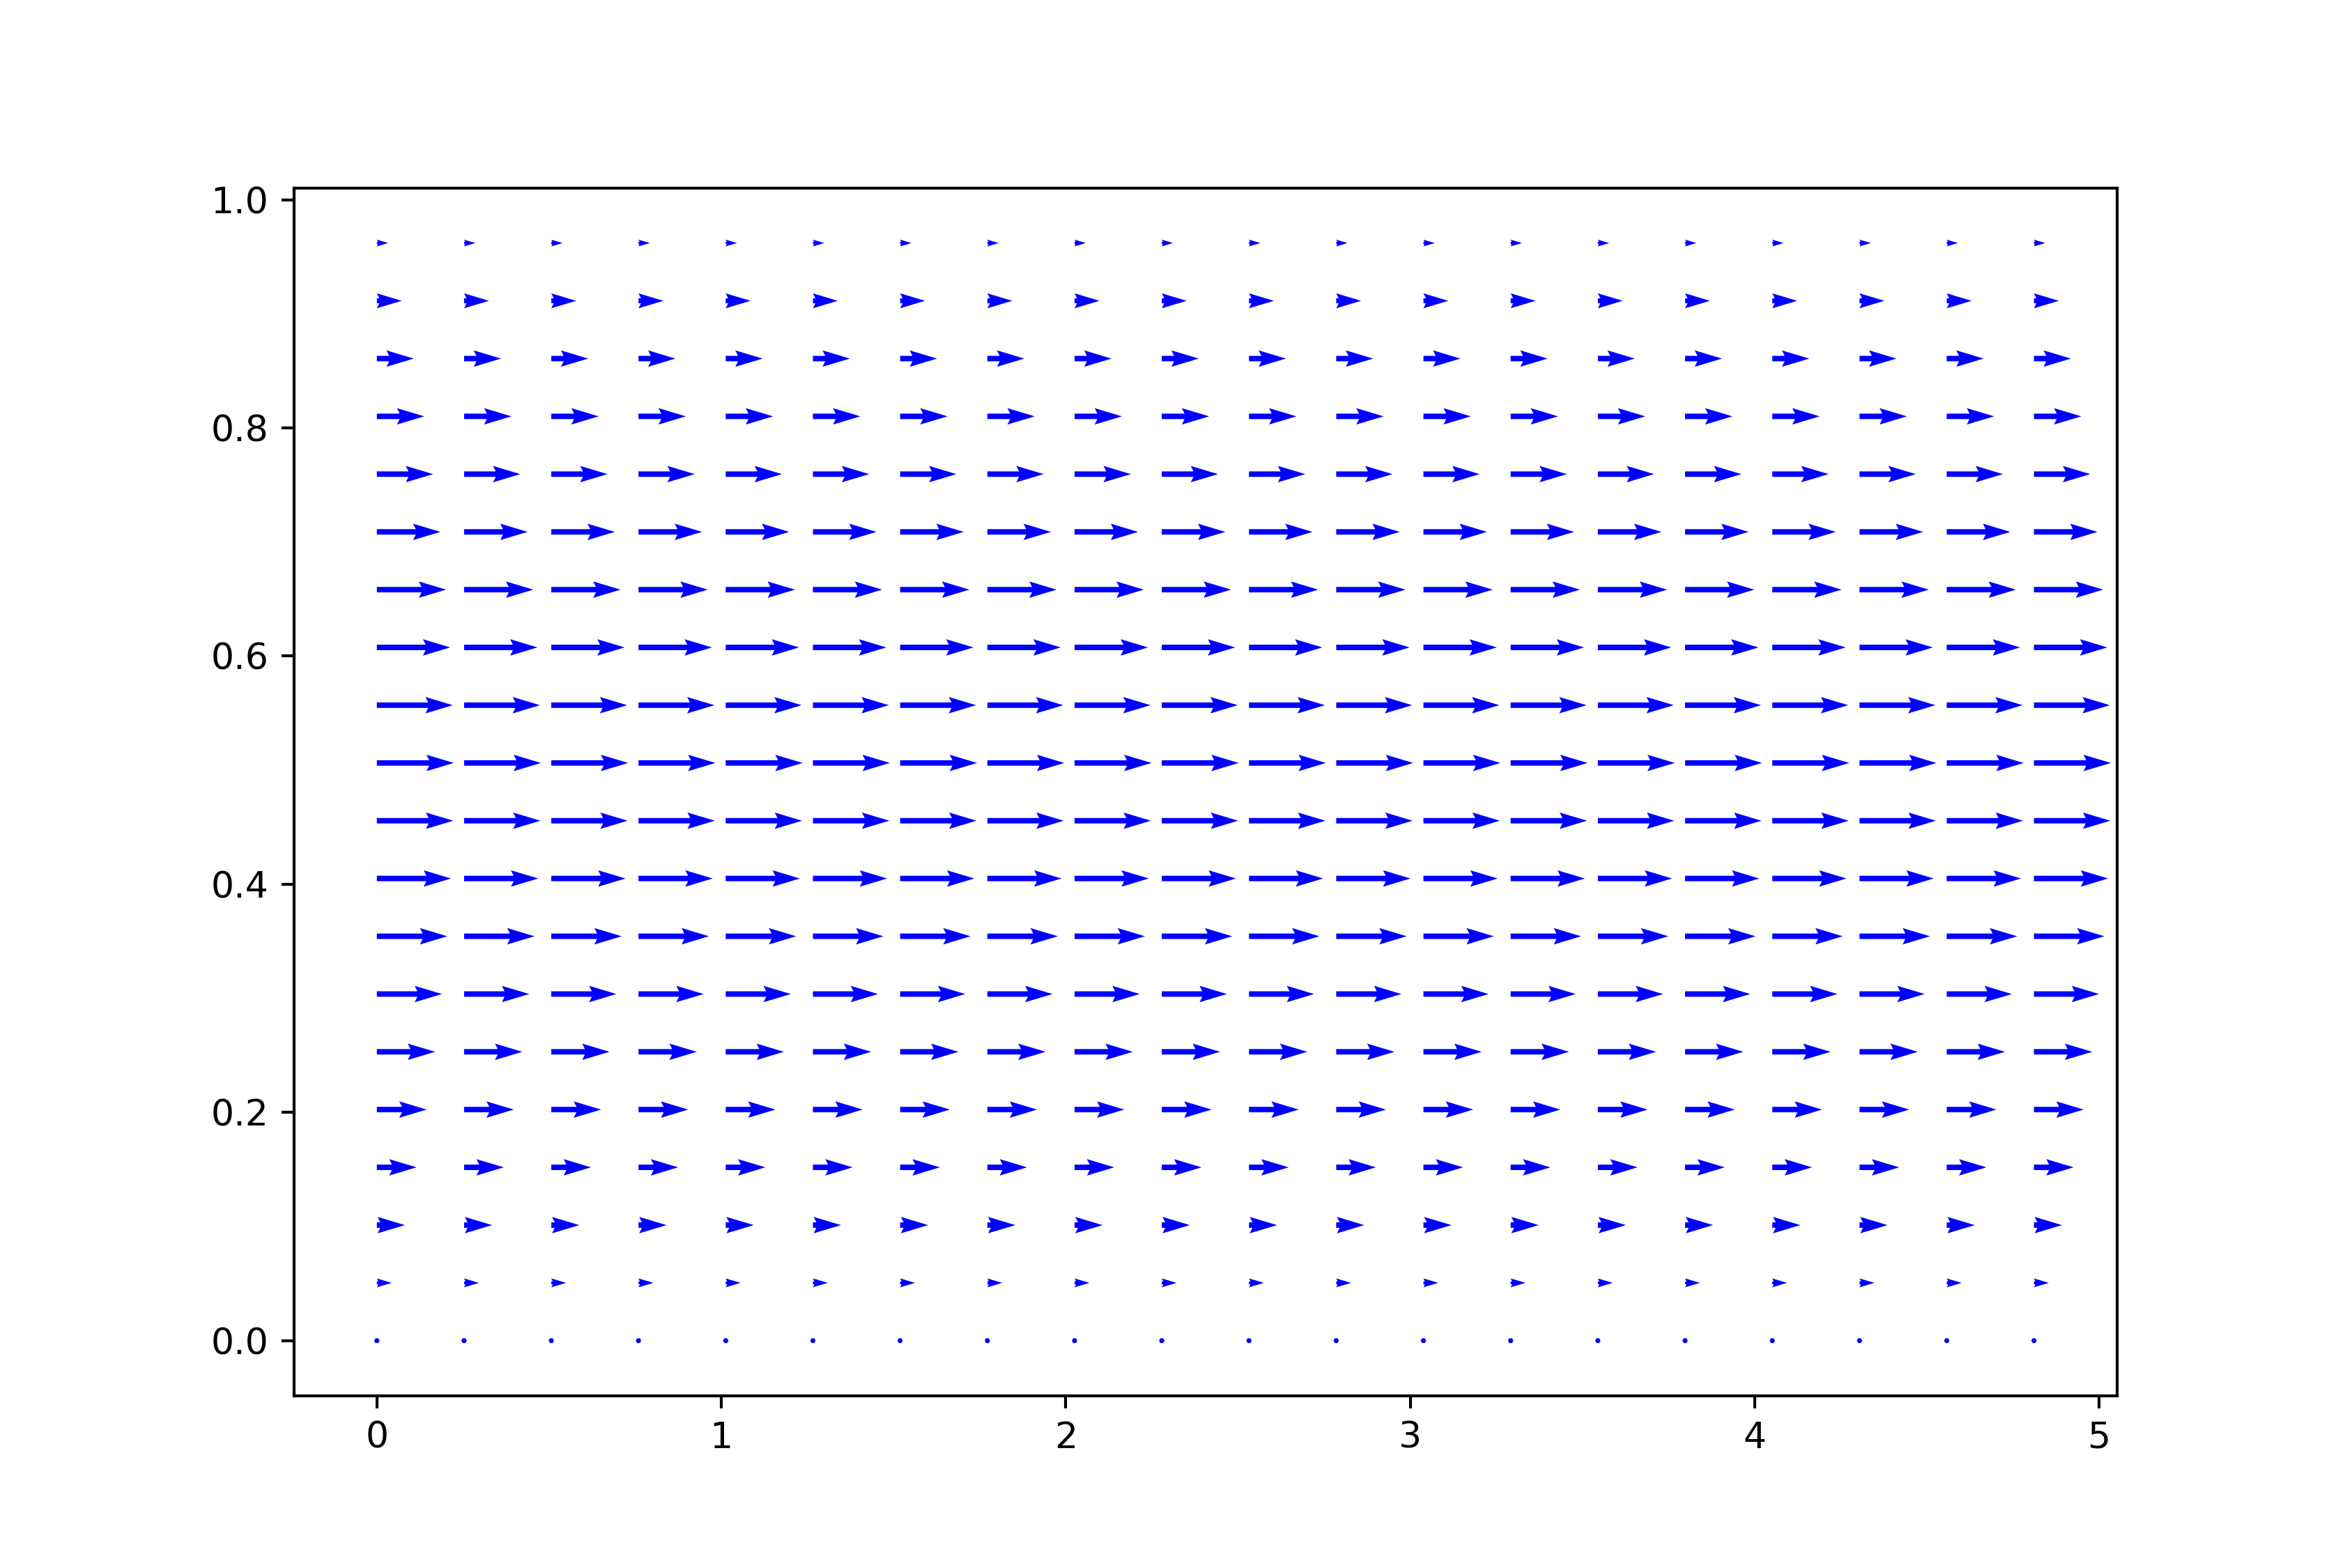

In [76]:
fig = plt.figure(figsize = (9,6), dpi=300)
plt.quiver(X[::4, ::4], Y[::4, ::4], u0[::4, ::4], v0[::4, ::4], color='b');
plt.savefig('campo_velocidades.png')
plt.show()

É possível visualizar no gráfico abaixo que o fluxo toma contornos suaves e bem definidos, com maior intensidade na região central. Quanto mais perto das placas menor a velocidade, como seria de esperar.

É possível ver que a velocidade segundo y é 0, tal como dá a parecer o gráfico do campo de velocidades acima. Estes valores seriam de esperar, uma vez que num regime estável a velocidade tem unicamente componente x, corroborando a assunção feita na derivação teórica deste resultado.

<IPython.core.display.Javascript object>


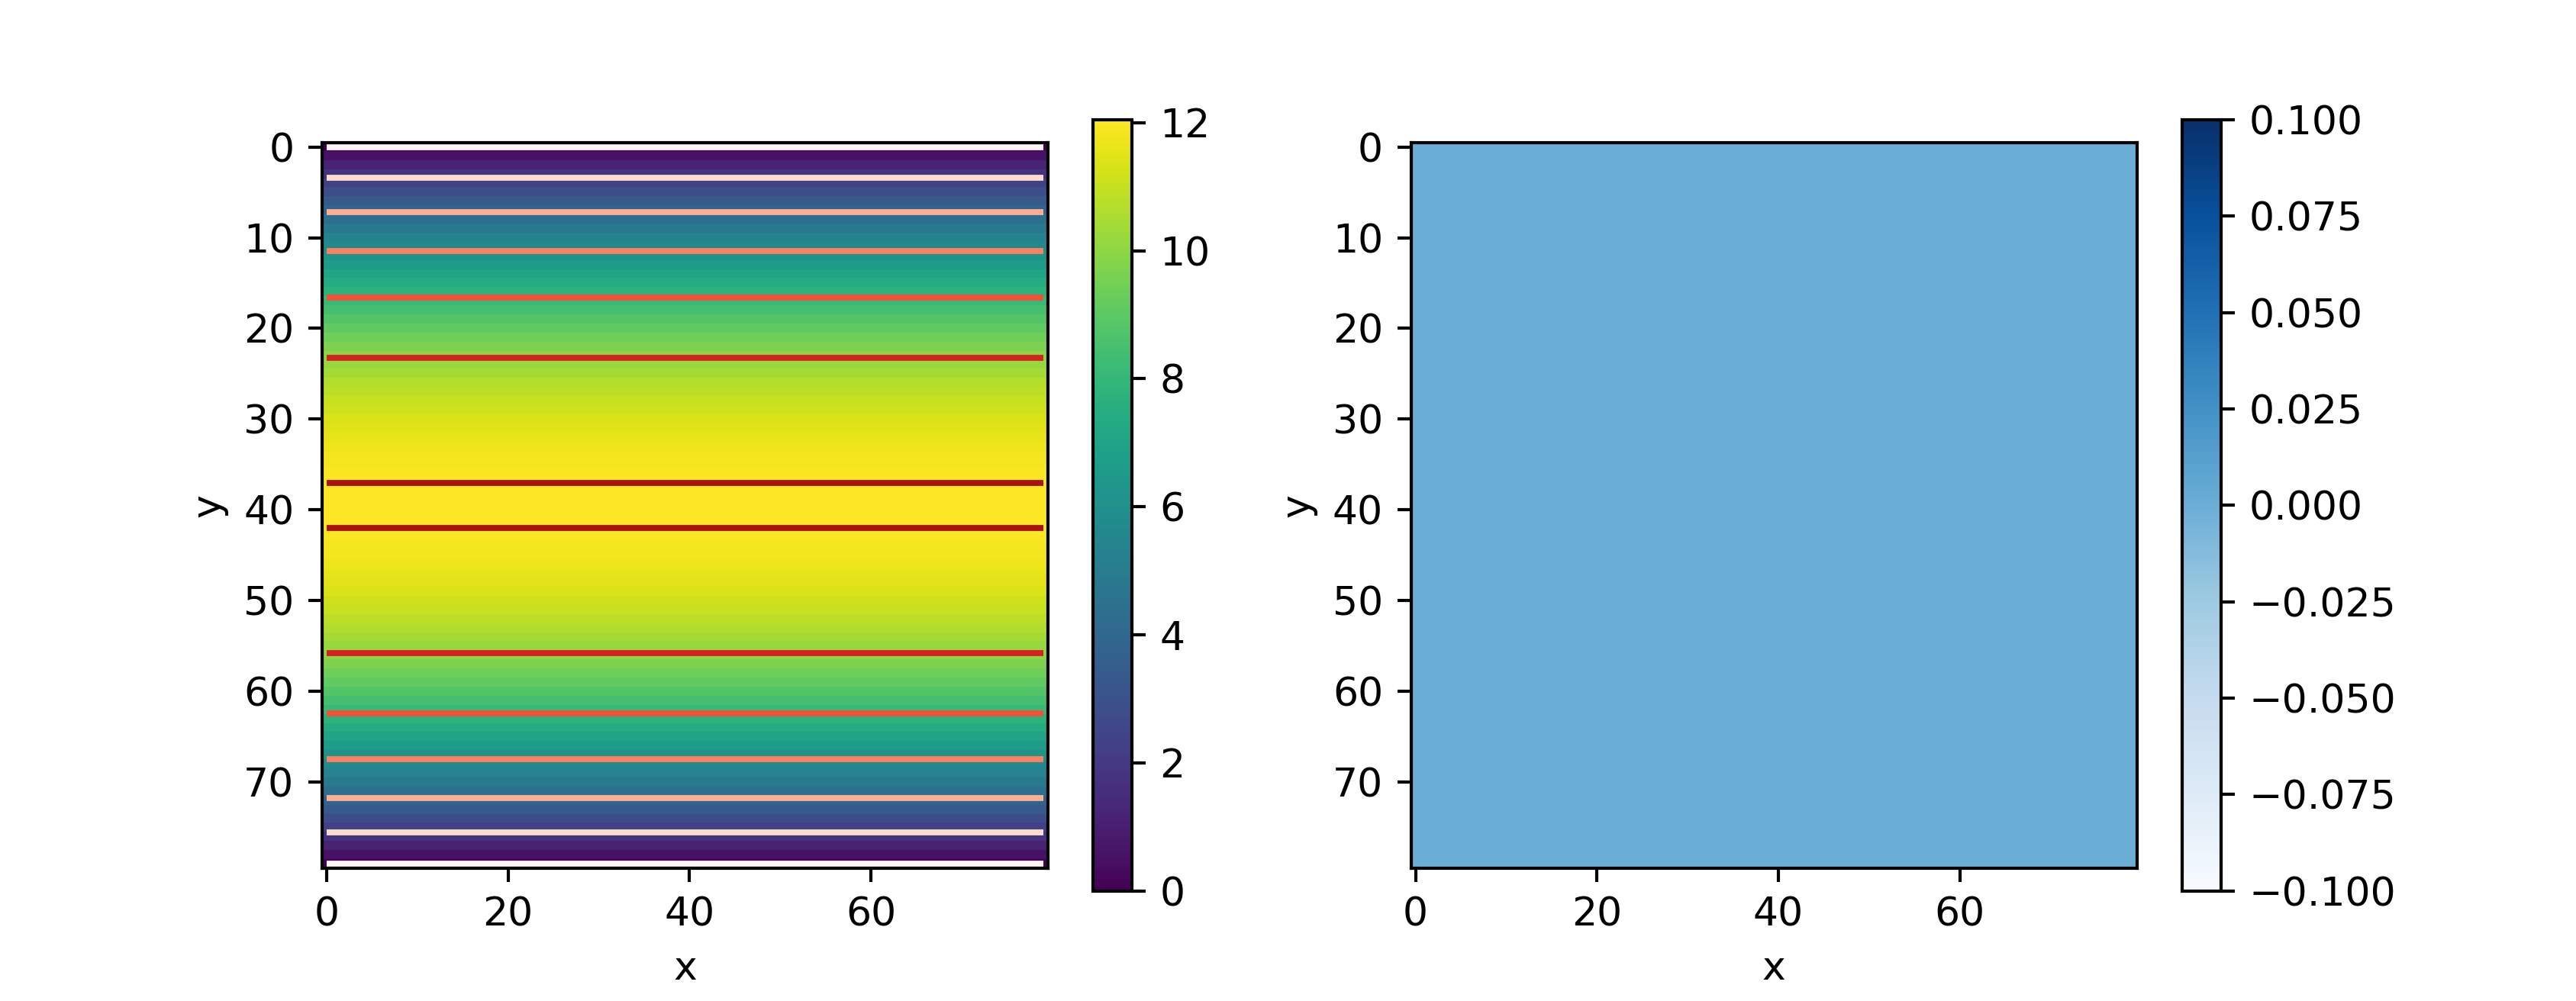

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (9,3.5), dpi=300)
im=ax1.imshow(u0)
fig.colorbar(im, ax=ax1)
ax1.contour(u0,cmap="Reds")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

im2=ax2.imshow(v0, cmap="Blues")
fig.colorbar(im2, ax=ax2)
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.savefig('graf_vel_x_y.png')
plt.show()

A título ilustrativo, cria-se um gráfico tri-dimensional para melhor visualizar o comportamento parabólico da componente x da velocidade

<IPython.core.display.Javascript object>


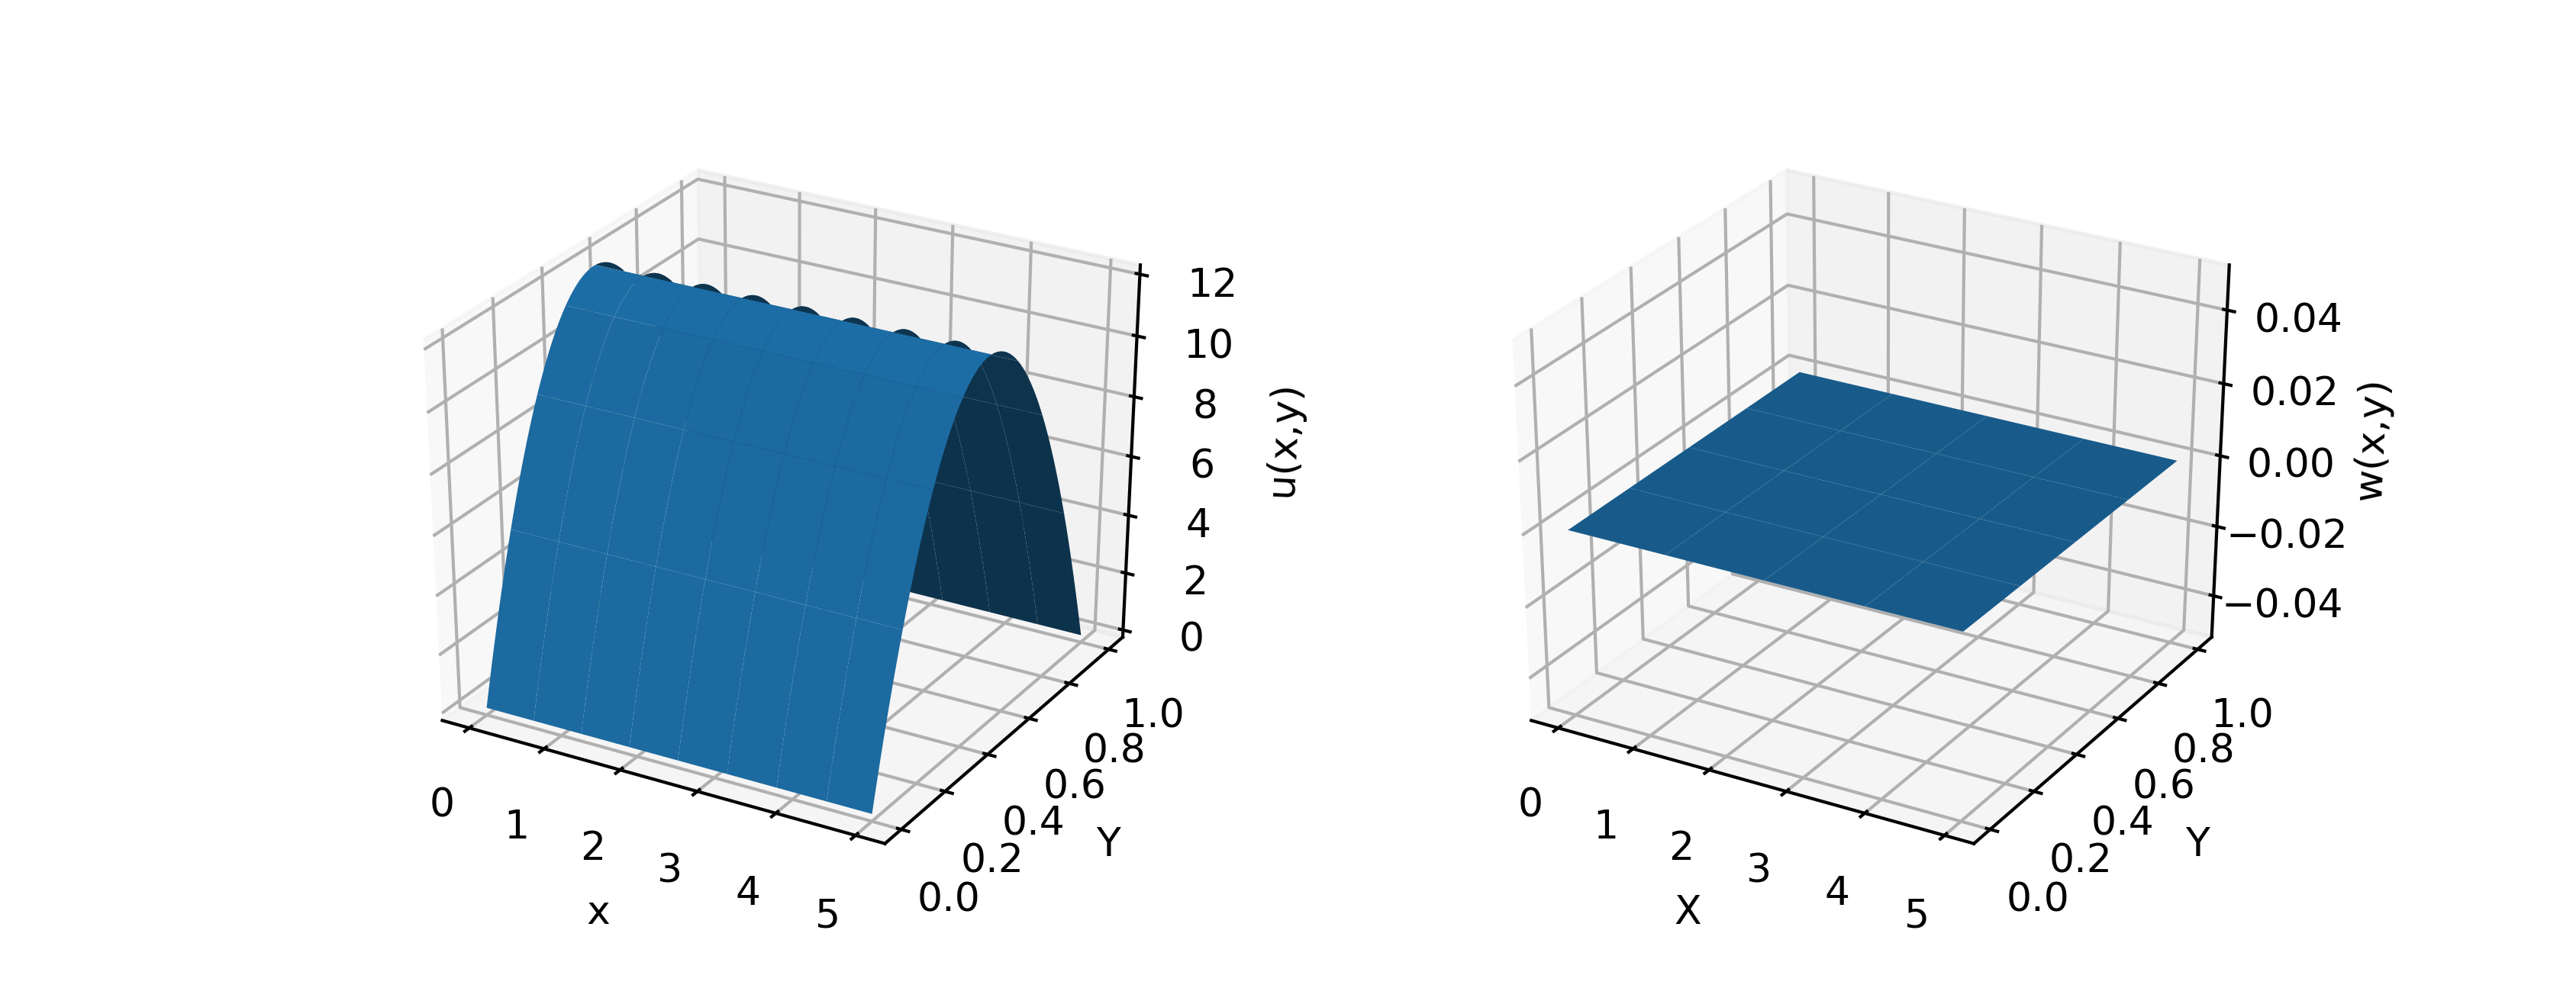

In [84]:
fig = plt.figure(figsize=(9,3.5), dpi=300)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

Z1=u0
Z2=v0

# Plot a basic wireframe
ax1.plot_surface(X, Y, Z1, rstride=10, cstride=10)
ax1.set_xlabel("x")
ax1.set_ylabel('Y')
ax1.set_zlabel("u(x,y)")


ax2.plot_surface(X, Y, Z2, rstride=20, cstride=20)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel("w(x,y)")

plt.savefig('graf_vel_xy_3D.png')
plt.show()

Cria-se também um gráfico de densidade da pressão. Observa-se que esta é nula em todos os pontos. Este resultado pode ser um pouco enganador, uma vez que a equação de Navier-Stokes depende diretamente do gradiente da pressão. O que aqui aconteceu foi uma divisão da pressão $P$ em duas pressões distintas:

$$P=p+p'$$

Onde $p$ é a componente estável da pressão e $p'$ a componente instável. Quanto à componente estável, esta está escondida por trás da força imposta na equação de Navier-Stokes para u. Assim $-\frac{dp}{dx}=F$, onde F tal como dito anteriormente, é uma força a atuar em todo os pontos do fluído e pode ser vista, por exemplo, como a força gravítica. 
Após estas considerações, e tendo em conta que este é um regime estável, é fácil perceber que a componente instável da pressão $p'$ é nula, tal como mostra o gráfico. (Estas considerações estão descritas na última das lições mencionadas no início deste documento)

<IPython.core.display.Javascript object>


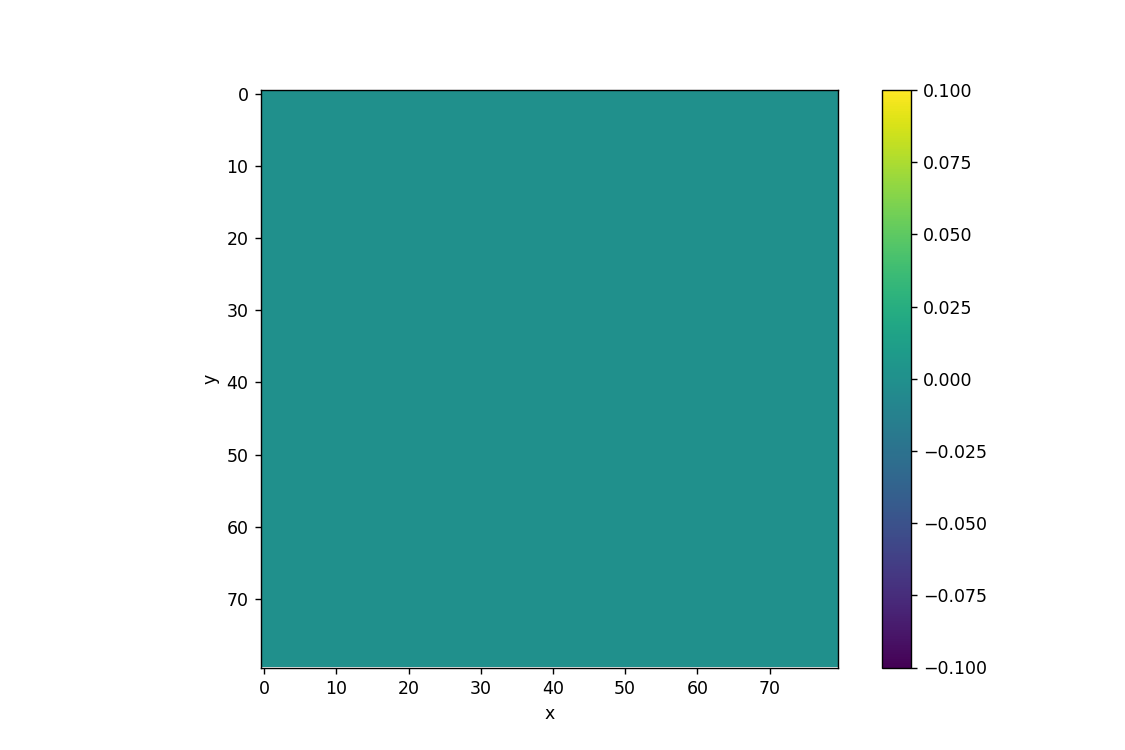

In [80]:
fig = plt.figure(figsize = (9,6), dpi=100)
plt.imshow(p0)
plt.colorbar()
plt.xlabel("x")
plt.ylabel("y")
plt.savefig('graf_pressao.png')
plt.show()

No gráfico abaixo é possível verificar o perfil da velocidade em função das várias distâncias em x. É de notar que as parábolas são todas idênticas e se sobrepõe, o que era de esperar num regime estável como este. A parábola a preto corresponde àquela obtida através de considerações teóricas. É de notar que as parábolas estão muito próximas e também que a razão entre a velocidade máxima e a velocidade média na saída do sistema é muito próxima de $\frac{3}{2}$, o que mostra que os resultados obtidos são coerentes com as deduções teóricas.

<IPython.core.display.Javascript object>


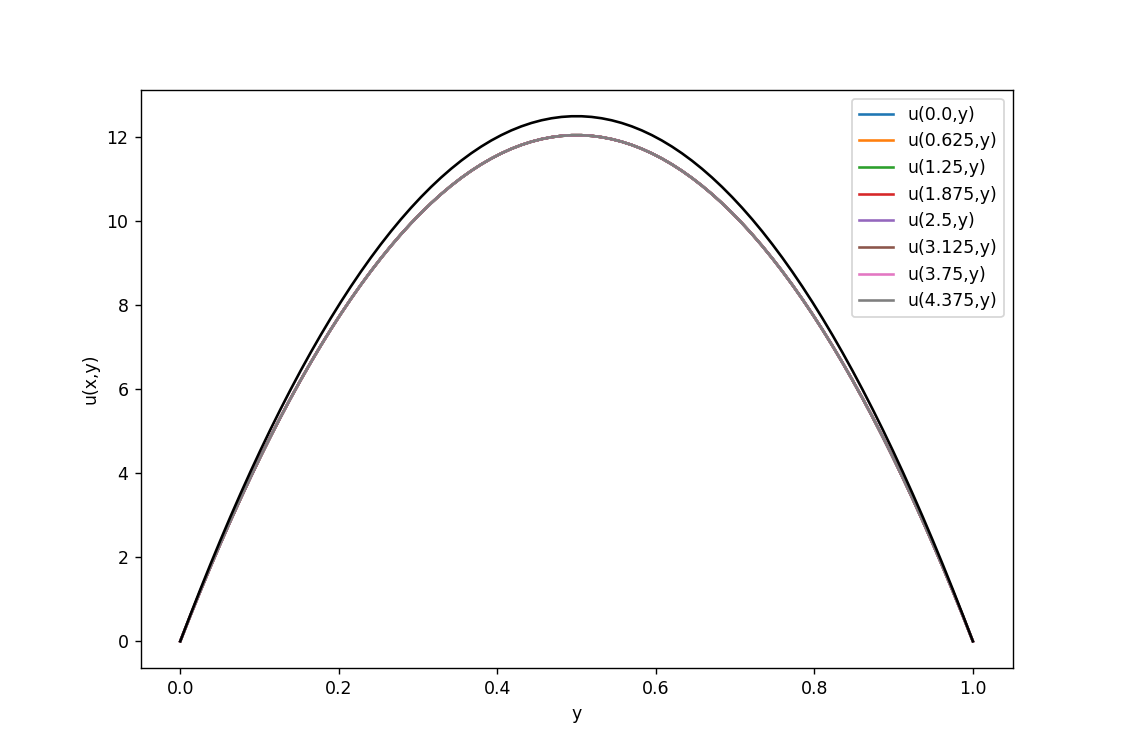

Razão entre a velocidade máxima e média na saída do sistema:  1.52


In [81]:
list1=np.arange(0,nx,10)
fig = plt.figure(figsize = (9,6), dpi=100)
legenda=[]
for i in list1:
    plt.plot(y,u0[:,i])
    posicao=round(i*dx,3)
    legenda.append("u({},y)".format(posicao))
    plt.legend(legenda)
plt.plot(y, F*(0.25-(y-0.5)**2)/(2*nu*rho) , color="k")
plt.xlabel("y")
plt.ylabel("u(x,y)")
plt.savefig('evolucao_vel_x.png')
plt.show()
print("Razão entre a velocidade máxima e média na saída do sistema: ",round(np.max(u0[:,-1])/np.mean(u0[:,-1]), 2))

De seguida executa-se uma animação da evolução temporal da velocidade segundo x no sistema.

# Segundo caso
Procede-se agora para a simulação e análise do caso mais instável, que se trata do caso em que o fluído entra na região entre as duas placas

In [16]:
#Comprimento das placas 
L=5
#Espaçamento entre as placas
d=1
#Tempo final
T=3

#Alterar o número de pontos da grelha afeta a convergência do algoritmo, 
#tal como alterar as variáveis físicas e o número de divisões do tempo. 

#Estes valores foram escolhidos depois de muita tentativa e erro, principalmente o valor de nt
nx = 101
ny = 101
nt = 5000

dx = L / (nx-1)
dy = d / (ny-1) 

#Variáveis físicas
rho = 1
Re=100
nu = d/Re
F = 0
U=1

#Necessários para fazer os plots
x = np.linspace(0, L, nx)
y = np.linspace(0, d, ny)
X, Y = np.meshgrid(x, y)

In [17]:
#Adotar condições de fonteira com instabilidade (1)
inst=1
u1,v1,p1,vxt1=placas_Euler(nt,dx,dy,rho,nu,F,inst)

Tal como no caso anterior, de modo a se poder analisar melhor o perfil segundo y, executa-se um gráfico do campo de velocidades. Só se representam os vetores de 4 em 4 pontos para se poder fazer uma melhor análise qualitativa. 

É possível ver que a velocidade tende a assumir um comportamento parabólico em cada posição x ao longo do comprimento das placas. Verifica-se também que na região mais à esquerda existe uma pequena componente y da velocidade, que vai desaparecendo ao longo de x. 

Observa-se que ao longo de x o fluido assume um comportamento cada vez mais idêntico ao que foi descrito no caso anterior.

<IPython.core.display.Javascript object>


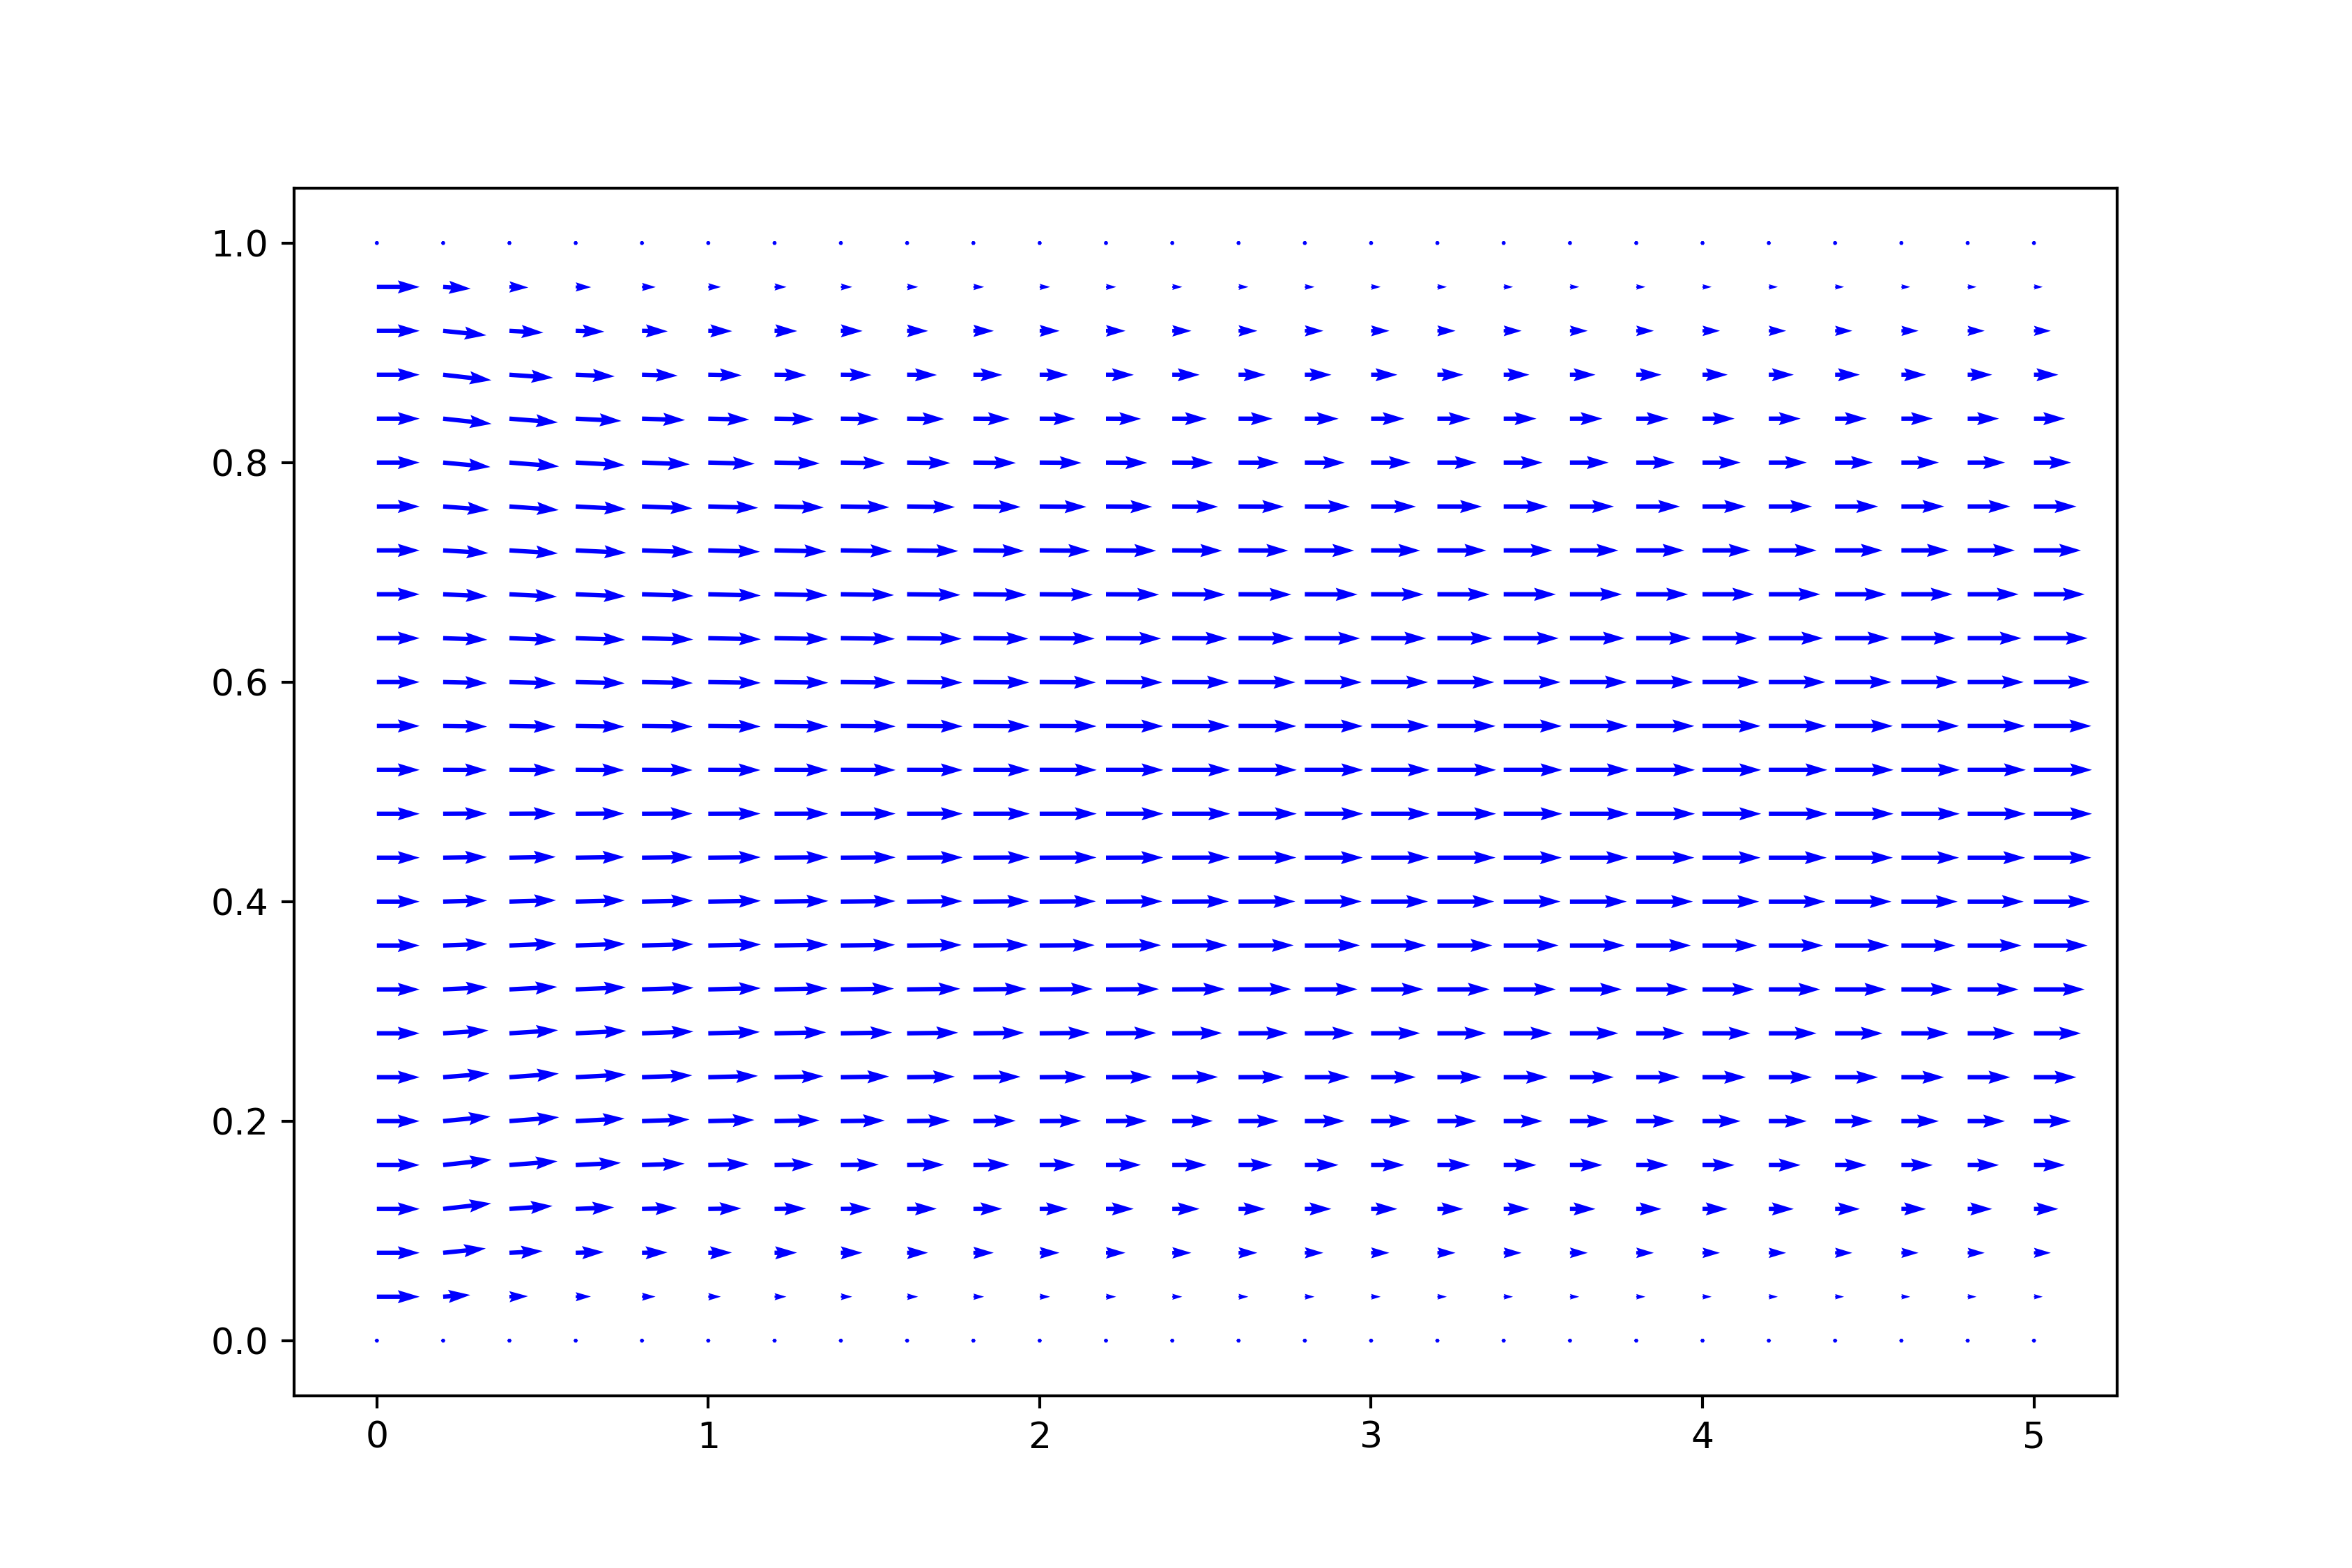

In [69]:
fig = plt.figure(figsize = (9,6), dpi=300)
plt.quiver(X[::4, ::4], Y[::4, ::4], u1[::4, ::4], v1[::4, ::4], color='b');
plt.savefig('campo_velocidades.png')
plt.show()

É possível visualizar no gráfico abaixo que na região mais à esquerda a velocidade é um pouco irregular, mas tende a assumir contornos mais bem definidos e linhas de contorno cada vez mais paralelas na região mais à direita, muito parecidos àqueles obtidos no caso anterior. Verifica-se também que quanto mais perto das placas menor é a velocidade.

Verifica-se a existência de uma componente y residual da velocidade, que se anula na região mais à direita. Esta velocidade residual é explicada pelo facto de o fluído na parte esquerda estar ainda a se adaptar aos constrangimentos impostos pelas placas, não assumindo o perfil homogéneo que mais à frente assume. 

Poder-se-á dizer que estamos perante um fenómeno transitório entre a forma da velocidade à entrada e a forma parabólica característica, obtida analíticamente, de modo que existe uma componente y da velocidade que de certa forma leva a que a componente x seja cada vez mais ajustada a uma parábola, e daí estar a diminuir até 0 na região mais à direita, onde a componente x já assumiu essa forma.

<IPython.core.display.Javascript object>


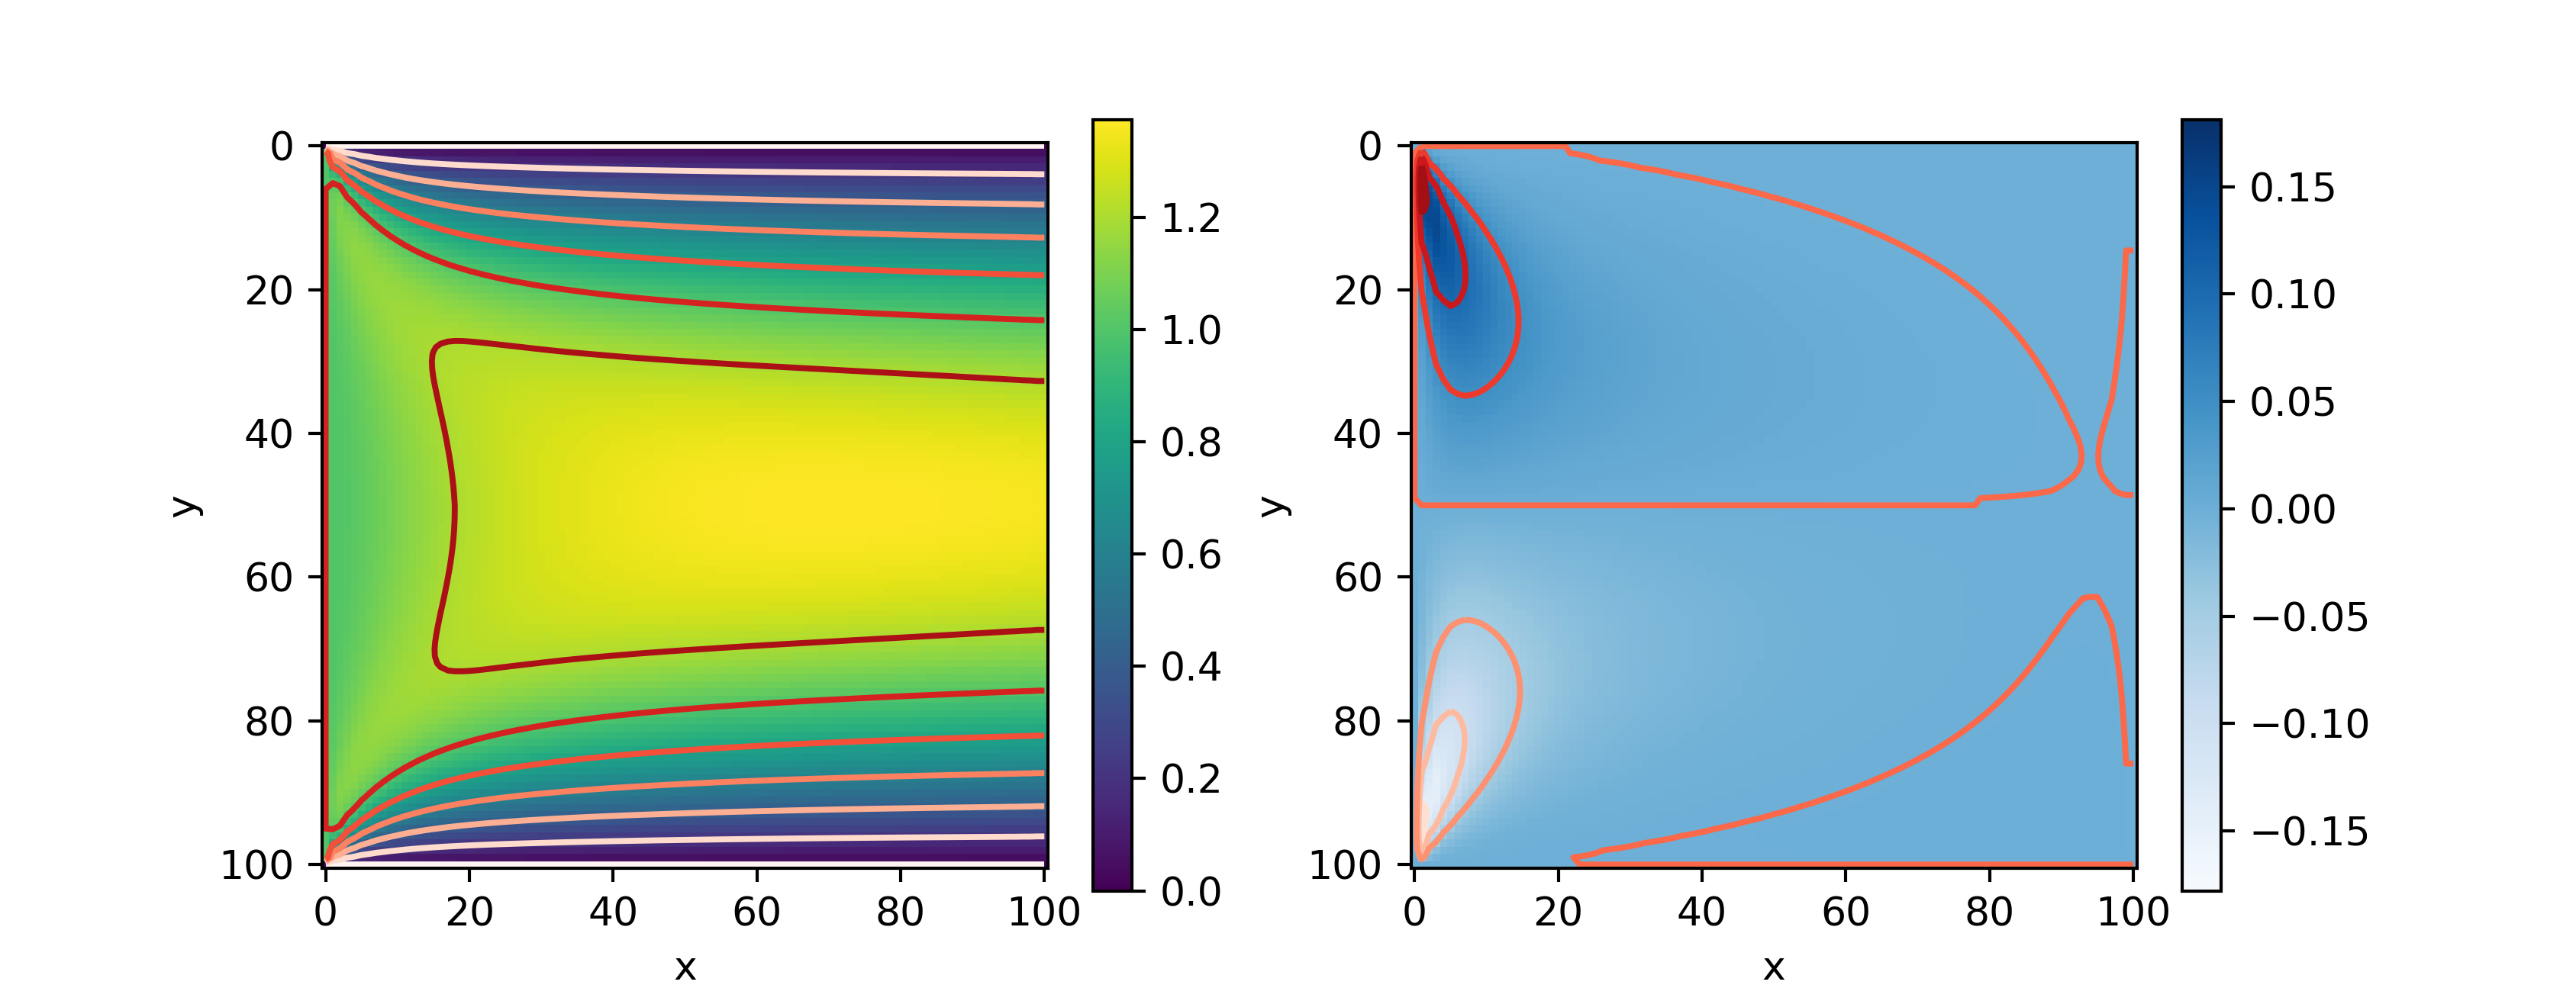

In [55]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (9,3.5), dpi=300)
im=ax1.imshow(u1)
fig.colorbar(im, ax=ax1)
ax1.contour(u1,cmap="Reds")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

im2=ax2.imshow(v1, cmap="Blues")
fig.colorbar(im2, ax=ax2)
ax2.contour(v1,cmap="Reds")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
plt.savefig('graf_vel_x_y.png')
plt.show()

A título ilustrativo, cria-se um gráfico tridimensional das componentes da velocidade, tal como no caso anterior. 

<IPython.core.display.Javascript object>


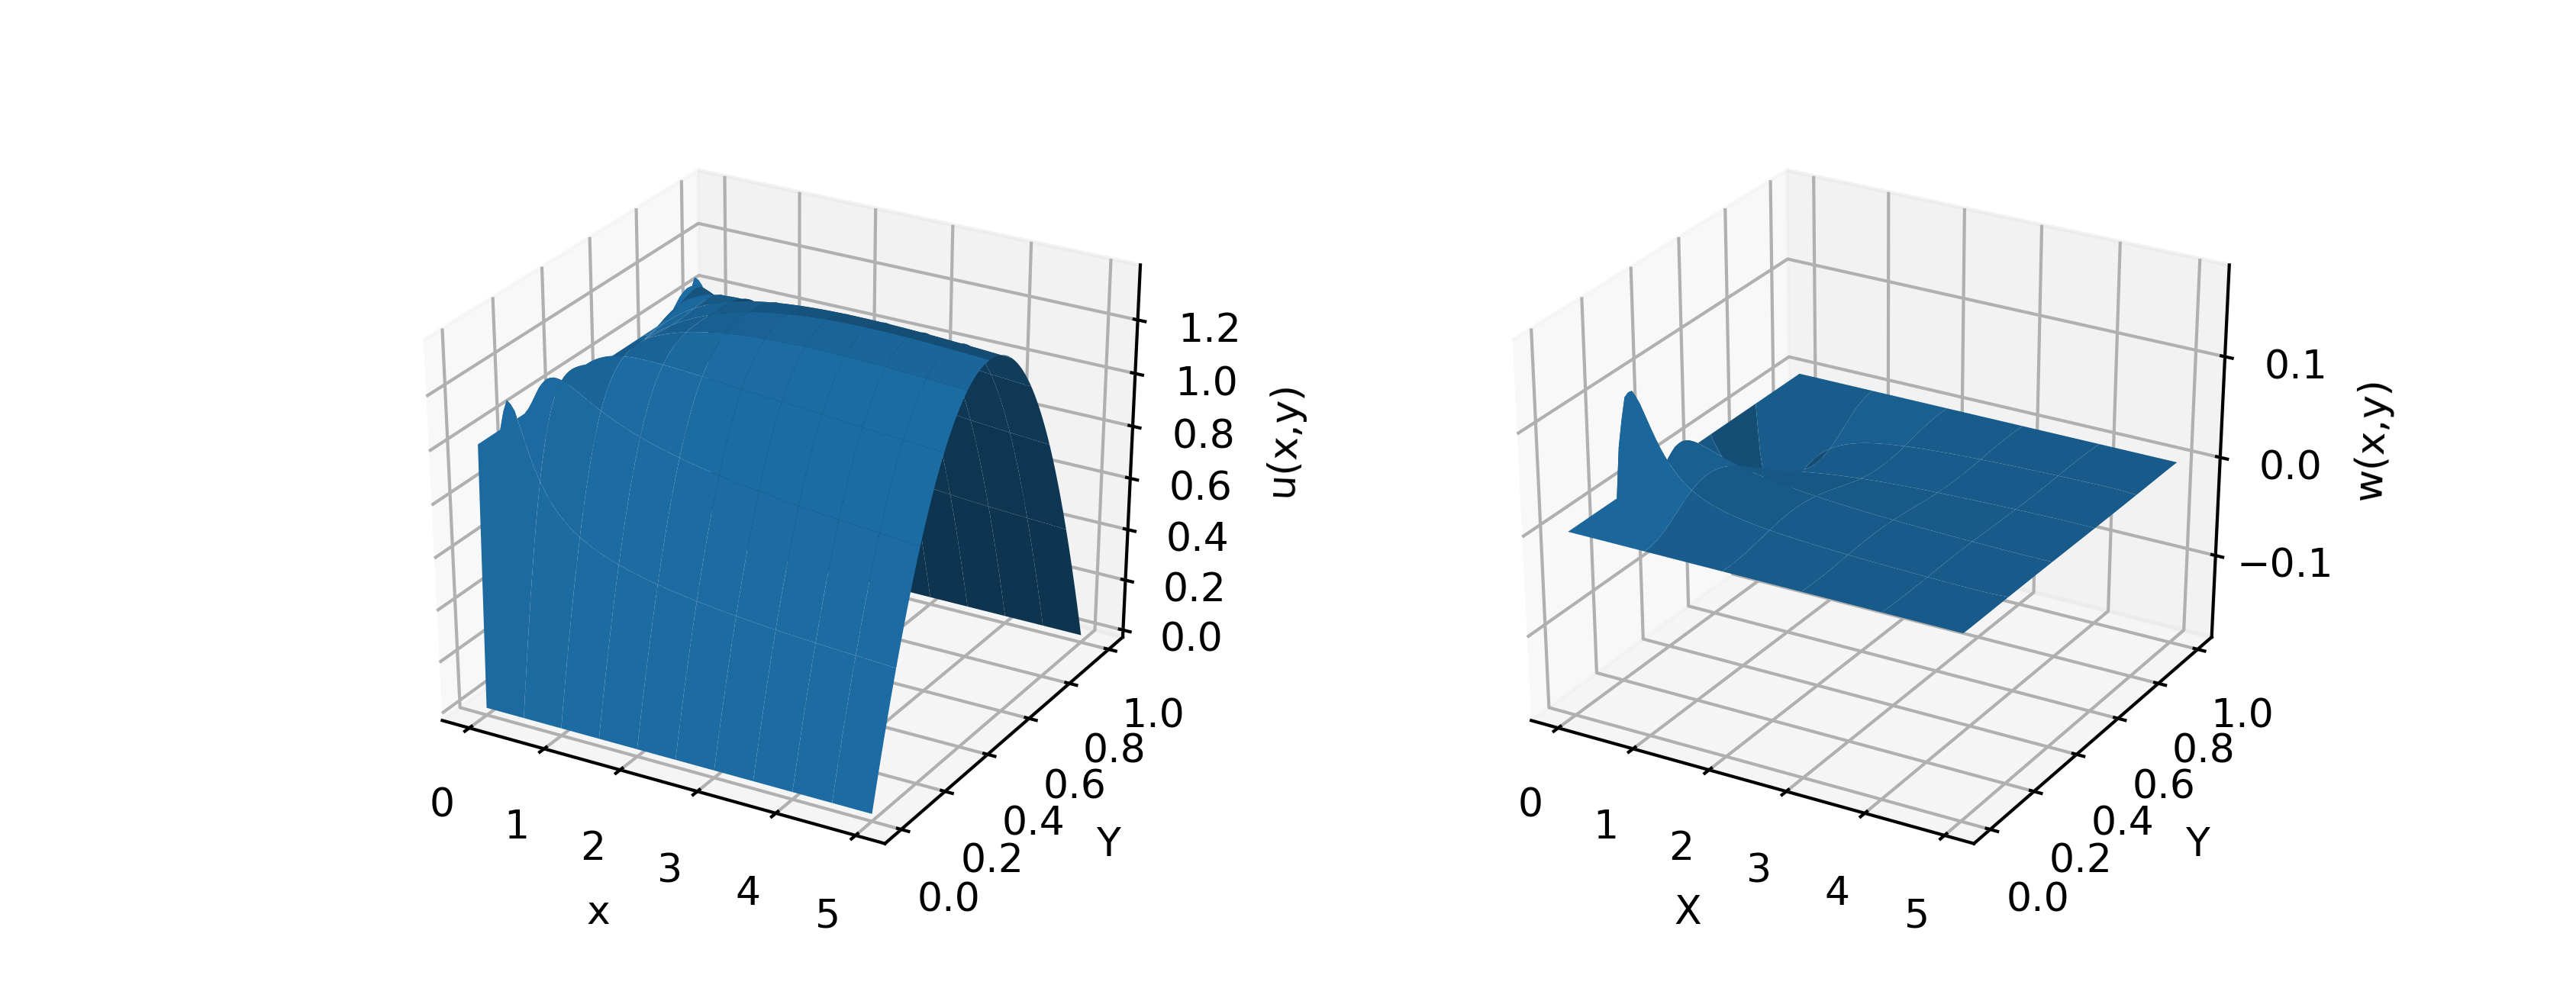

In [63]:
fig = plt.figure(figsize=(9,3.5), dpi=300)
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

Z1=u1
Z2=v1

# Plot a basic wireframe
ax1.plot_surface(X, Y, Z1, rstride=10, cstride=10)
ax1.set_xlabel("x")
ax1.set_ylabel('Y')
ax1.set_zlabel("u(x,y)")


ax2.plot_surface(X, Y, Z2, rstride=20, cstride=20)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel("w(x,y)")

plt.savefig('graf_vel_xy_3D.png')
plt.show()

Executa-se também um gráfico de densidade da pressão. Neste caso, consegue-se ver que já não é constante, assumindo um perfil característico da solução de uma equação de Poisson, com máximos nos cantos à esquerda, onde o fluído entra.

Verifica-se que as curvas de pressão obtidas tendem para uma reta tal como previsto, porém estas sofrem uma translação em relação à reta teórica. Este fenómeno pode talvez ser justificado por sucessivas acumulações de erros numéricos na resolução da equação de Poisson, ou talvez pelo facto de se estar a considerar a divergência da velocidade nessa resolução*. De qualquer forma, o que é físicamente relevante para o sistema é o gradiente de pressão e não o seu valor numérico. Assim sendo, os resultados obtidos para a velocidade continuam a ser válidos.

*(para mais detalhes remeter para o capítulo 19.2, secção "Divergence suppression" do livro mencionado no ínicio deste documento)

<IPython.core.display.Javascript object>


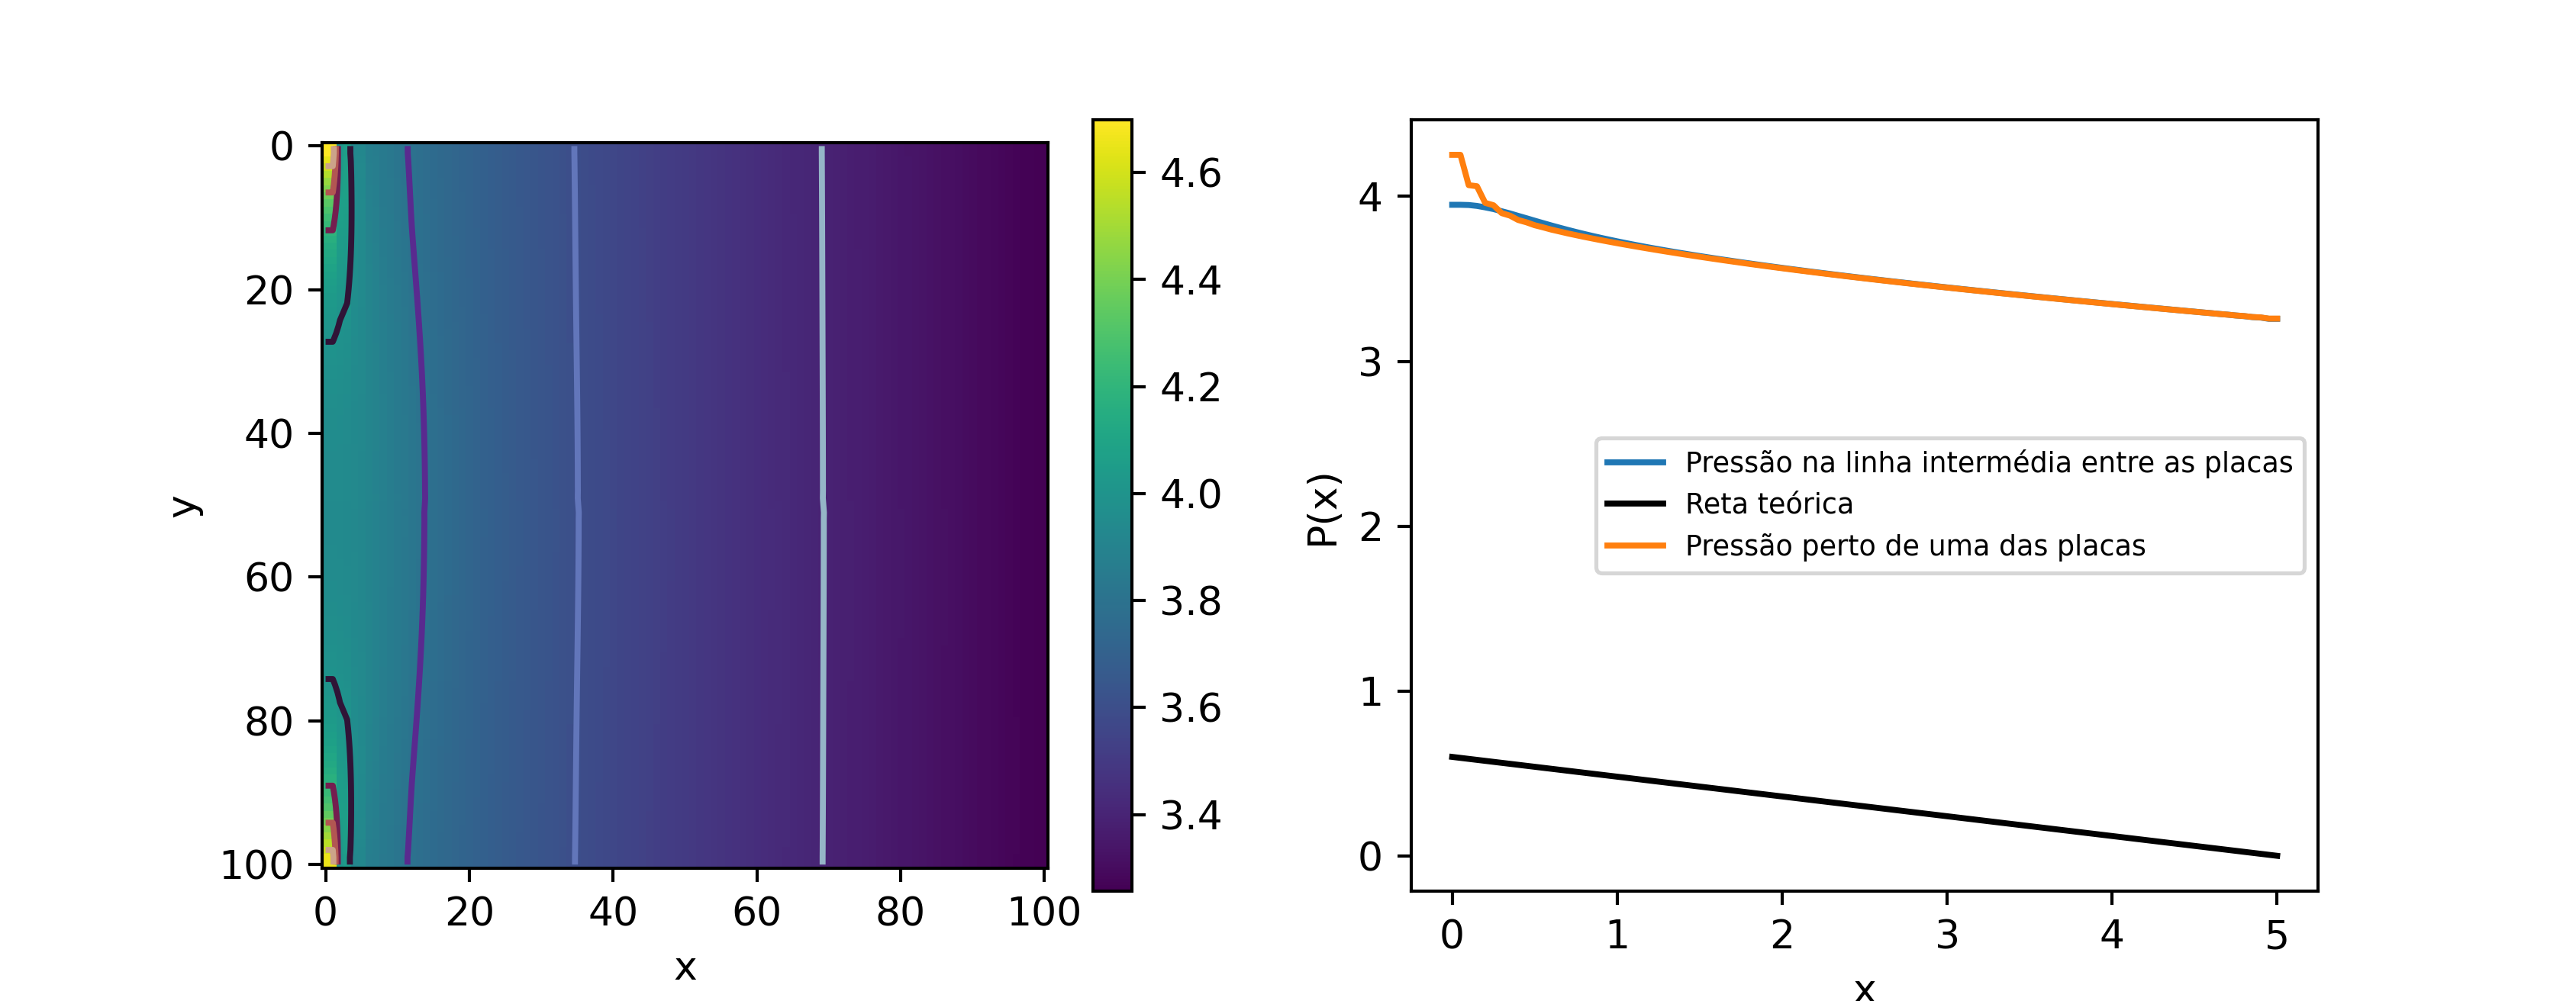

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (9,3.5), dpi=300)
im=ax1.imshow(p1)
fig.colorbar(im, ax=ax1)
ax1.contour(p1,cmap="twilight")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(x,p1[int(ny/2),:], label="Pressão na linha intermédia entre as placas")
ax2.plot(x,3*nu*U*rho*(L - x)/(d/2)**2, color="k", label="Reta teórica")
ax2.plot(x,p1[10,:], label="Pressão perto de uma das placas")
ax2.set_xlabel("x")
ax2.set_ylabel("P(x)")
ax2.legend(fontsize=7)
plt.savefig('graf_pressao.png')
plt.show()

De modo a se poder visualizar a evolução da velocidade ao longo de x, executa-se um plot dos vários perfis da componente x da velocidade. Note-se que esta começa com um perfil bastante diferente do previsto, imposto pelas condições de fronteira, mas conforme se desloca em x tende para uma parábola. Verifica-se também que a razão entre a velocidade média e a velocidade máxima na saída do sistema é muito próxima de $\frac{3}{2}$, tal como previsto.

<IPython.core.display.Javascript object>


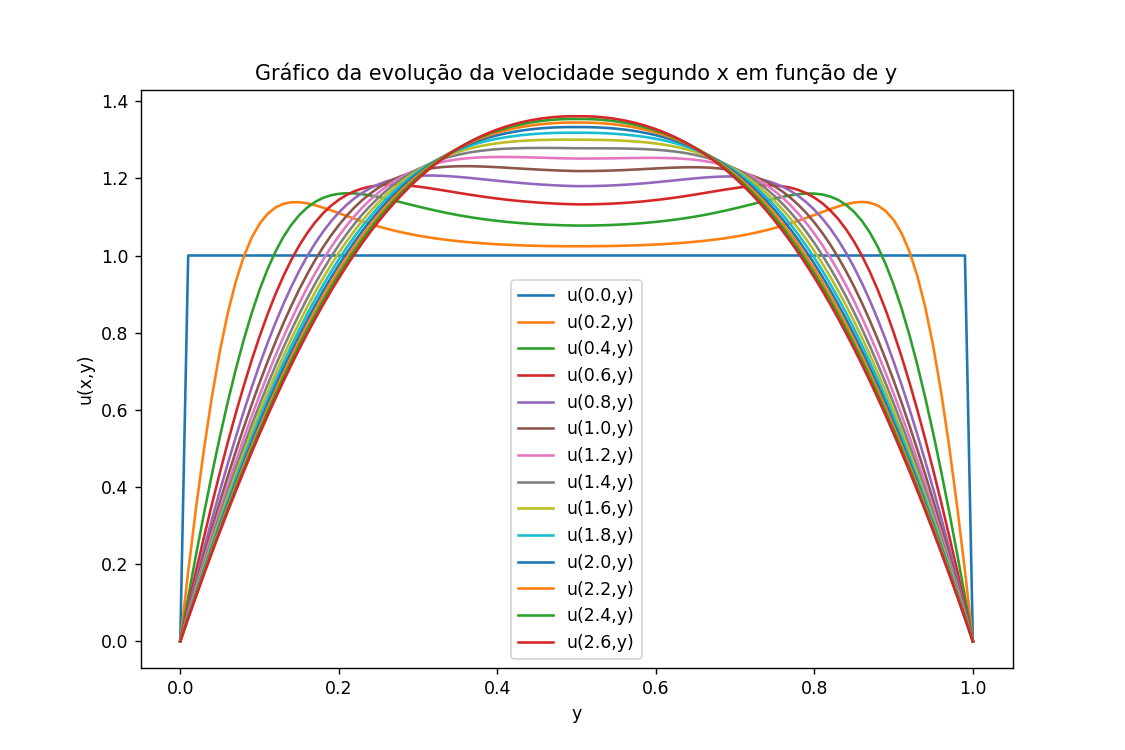

Razão entre a velocidade máxima e média na saída do sistema:  1.51


In [65]:
list1=np.arange(0,54,4)
fig = plt.figure(figsize = (9,6), dpi=100)
legenda=[]
for i in list1:
    plt.plot(y,u1[:,i])
    legenda.append("u({},y)".format(round(i*dx,1)))
    plt.legend(legenda)
plt.xlabel("y")
plt.ylabel("u(x,y)")
plt.title("Gráfico da evolução da velocidade segundo x em função de y")
plt.savefig('evolucao_vx.png')
plt.show()
print("Razão entre a velocidade máxima e média na saída do sistema: ",round(np.max(u1[:,-1])/np.mean(u1[:,-1]), 2))

Em jeito de conclusão, excetuando a translação da pressão no segundo caso, todos os resultados obtidos foram consistentes com as previsões analíticas feitas no início deste documento. 

Verificou-se que, para o primeiro caso estudado, a velocidade segundo x assume uma forma parabólica ao longo de y, forma esta constante ao longo de x. Observou-se também que a velocidade segundo y era nula, tal como a componente instável da pressão. As parábolas obtidas são muito próximas daquelas previstas, tal como a razão entre a velocidade máxima e a velocidade média. 

Para o segundo caso, verificou-se que o fluído se adapta às restrições impostas pelas placas na entrada do sistema, sendo que na região mais à direita a velocidade tende a assumir um comportamento semelhante ao descrito para o primeiro caso. Na região mais à esquerda existe uma pequena componente y da velocidade, que ao longo de x desaparece, dando lugar à forma parabólica prevista para a componente x. Quanto à pressão, esta não corresponde totalmente ao que foi previsto, porém (tal como dito anteriormente), o que é físicamente relevante é o seu gradiente, que se assemelha ao previsto, pelo que este desvio não é suficiente para invalidar os resultados obtidos. Além do mais, verifica-se que a pressão assume a forma característica de uma solução da equação de Poisson. 

De um modo geral, os resultados obtidos são bastante semelhantes aos previstos analíticamente.